# Import Libraries

In [156]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Overview

In [157]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [158]:
print(train.info())
print(train.describe())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Missing Data

In [159]:
missing_data = train.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])
missing_features = train.columns[train.isnull().any()].tolist()

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


# Visualize Price Distribution

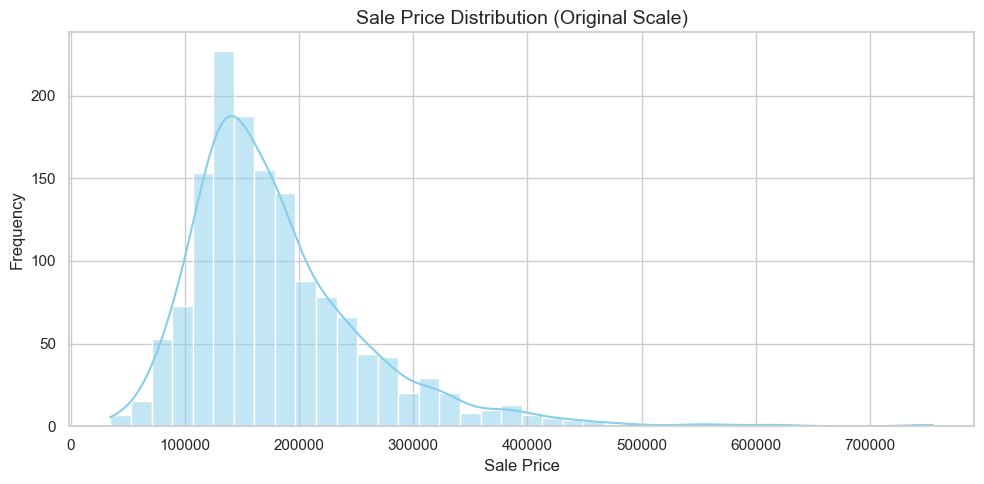

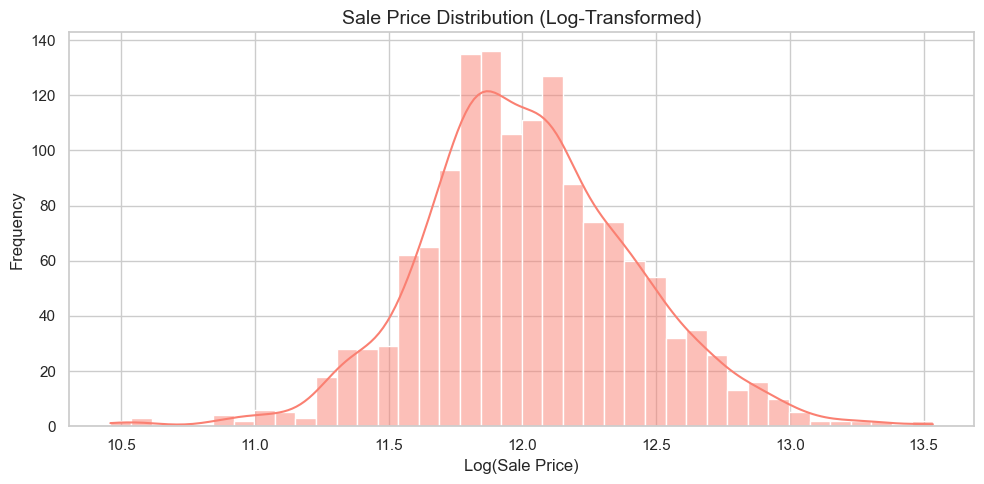

In [160]:
# Plot SalePrice distribution (original)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(train['SalePrice'], kde=True, bins=40, color='skyblue')
plt.title('Sale Price Distribution (Original Scale)', fontsize=14)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot SalePrice distribution (log-transformed)
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(train['SalePrice']), kde=True, bins=40, color='salmon')
plt.title('Sale Price Distribution (Log-Transformed)', fontsize=14)
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize Features vs Target

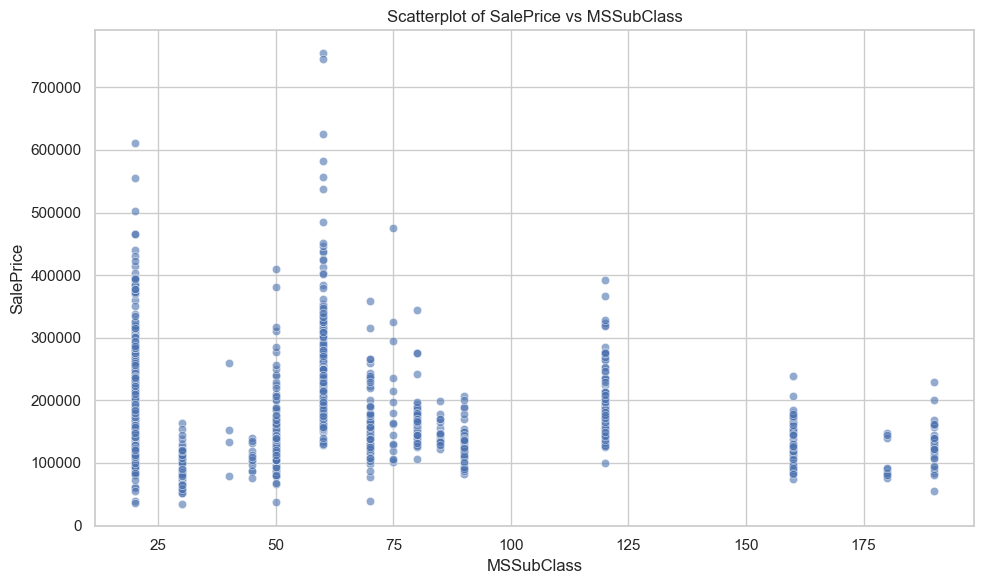

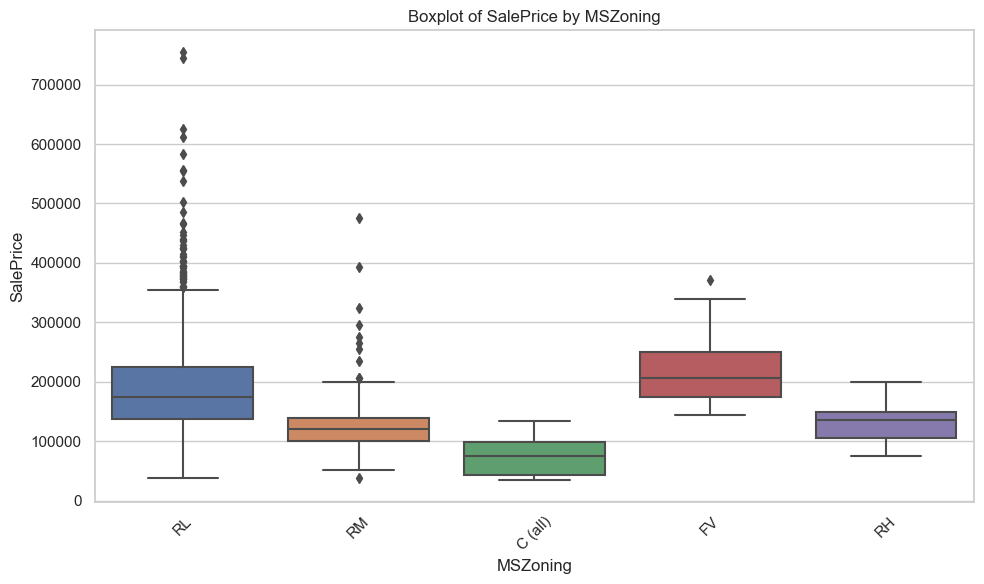

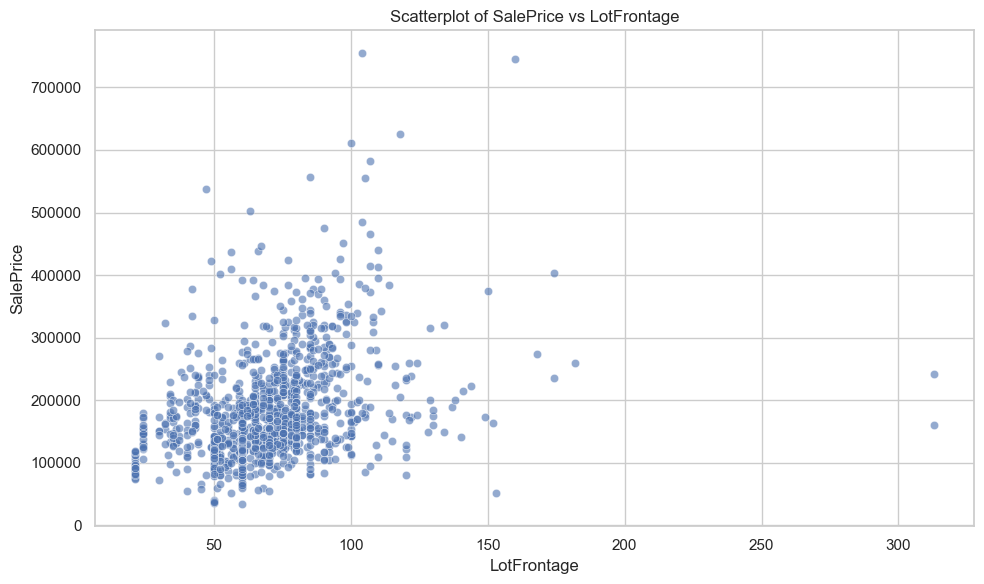

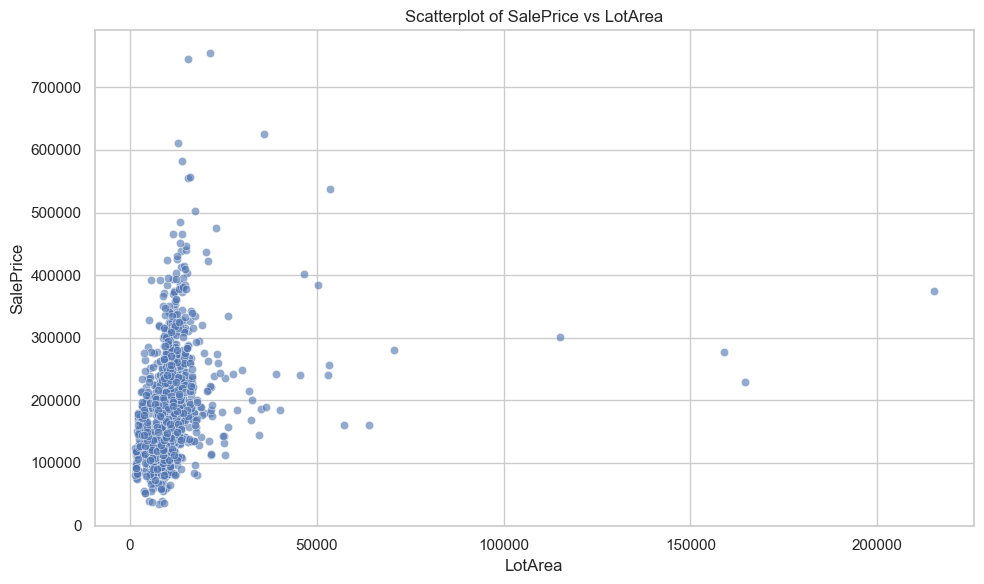

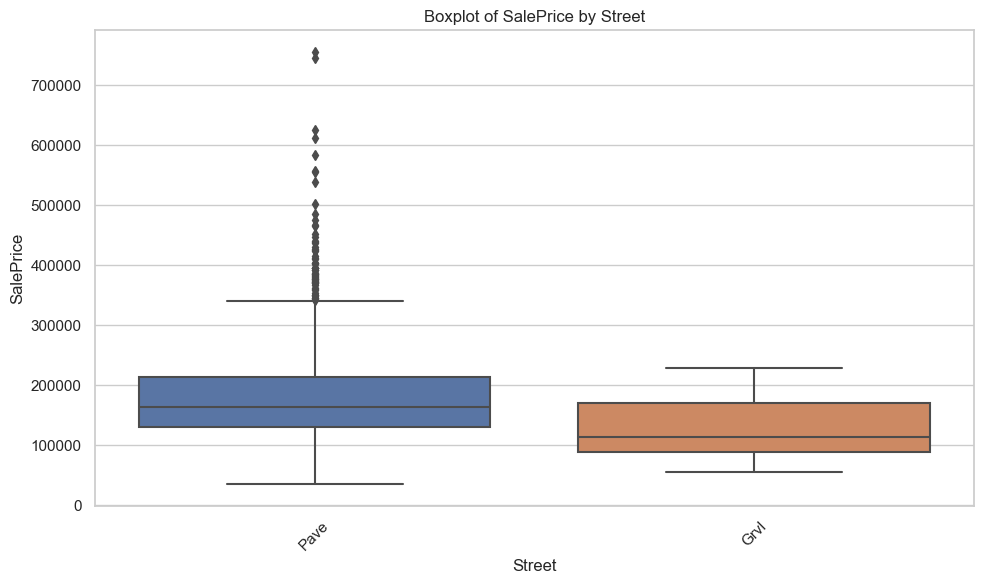

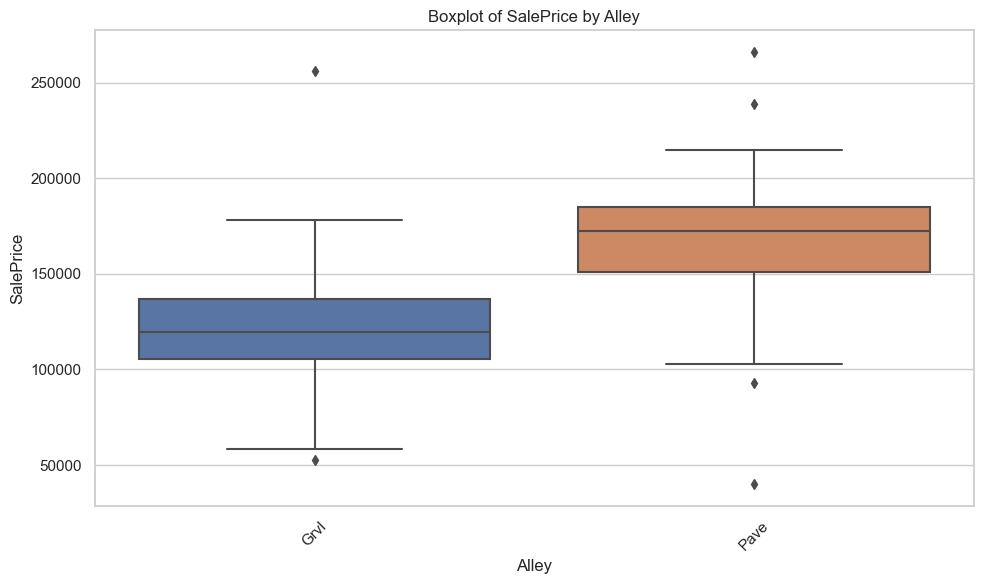

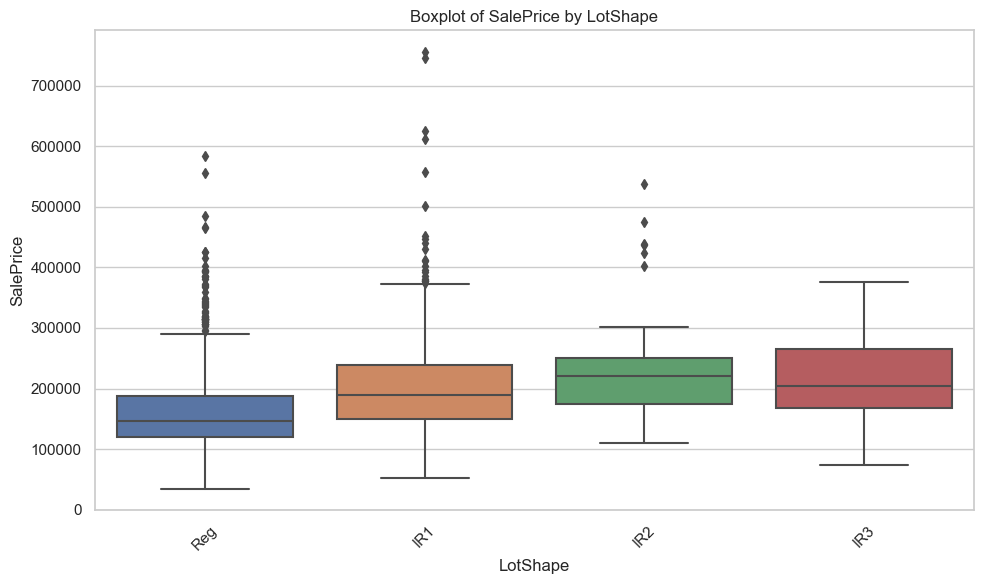

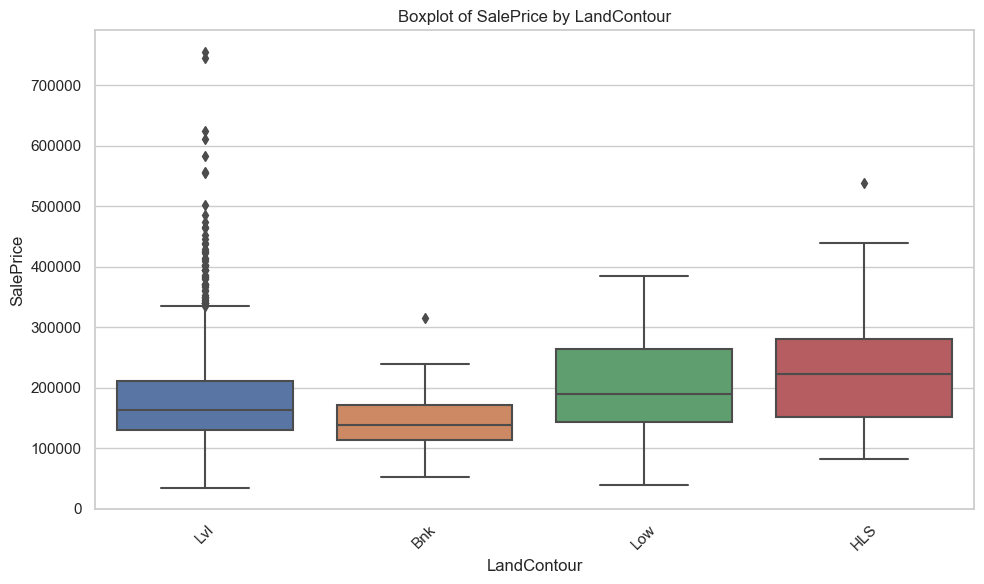

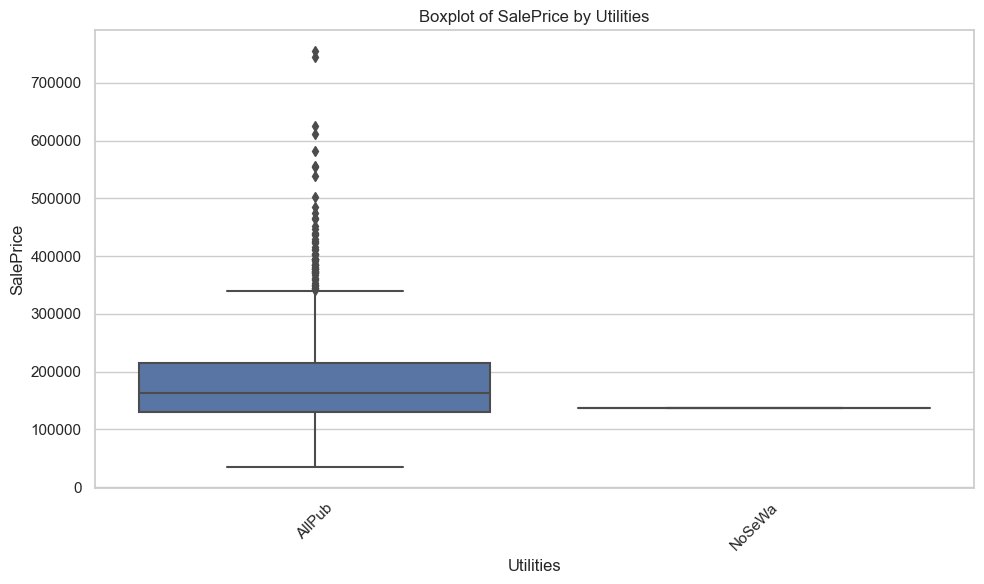

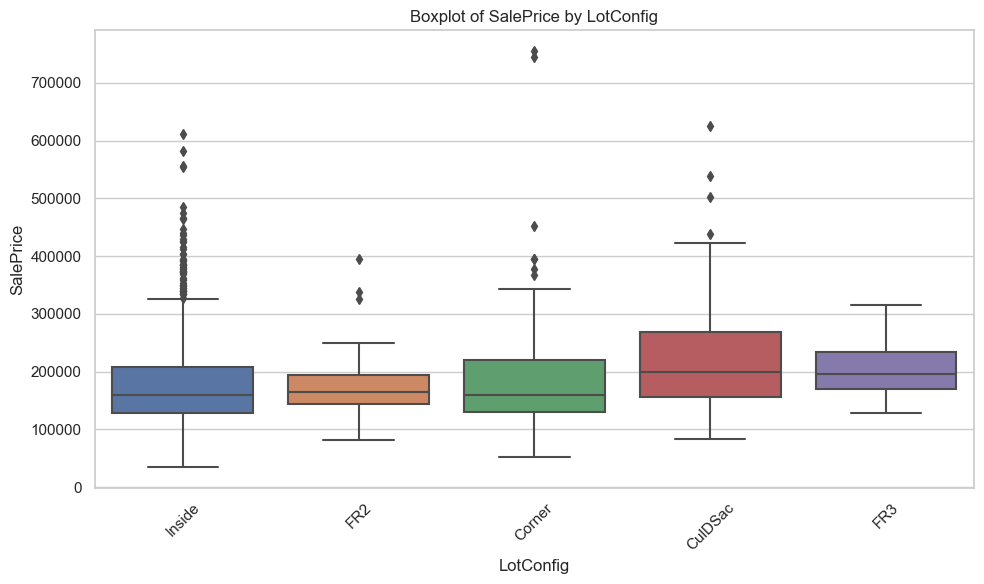

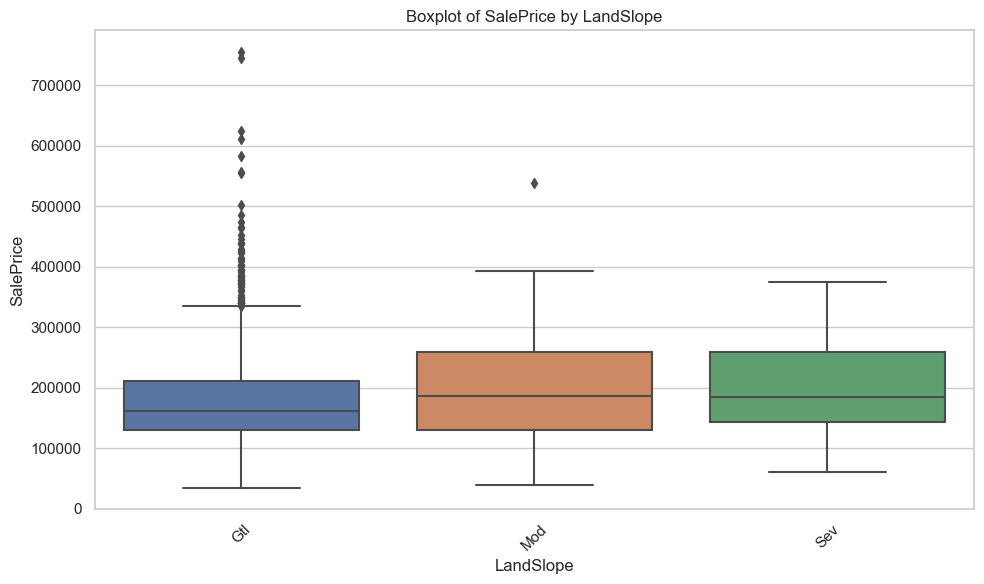

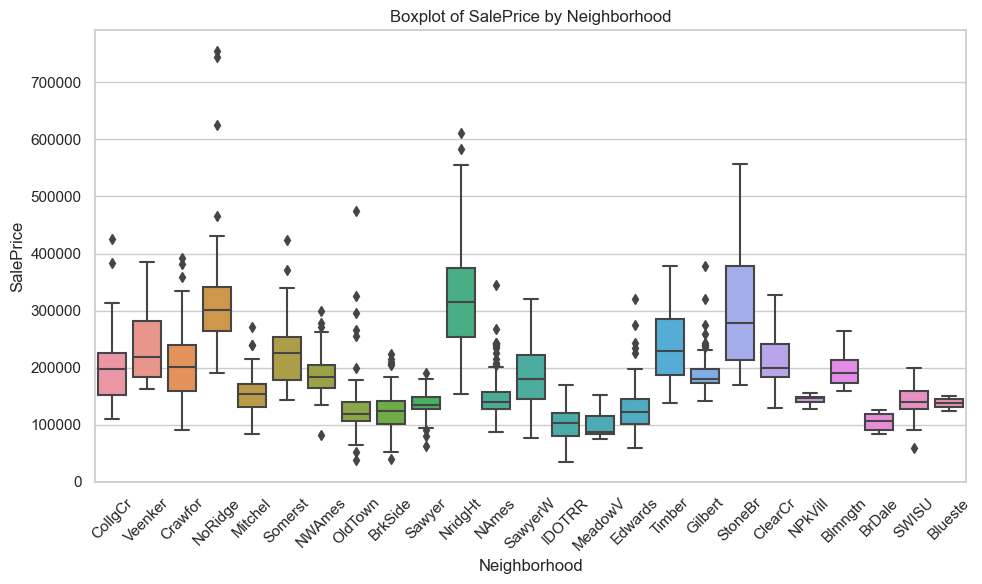

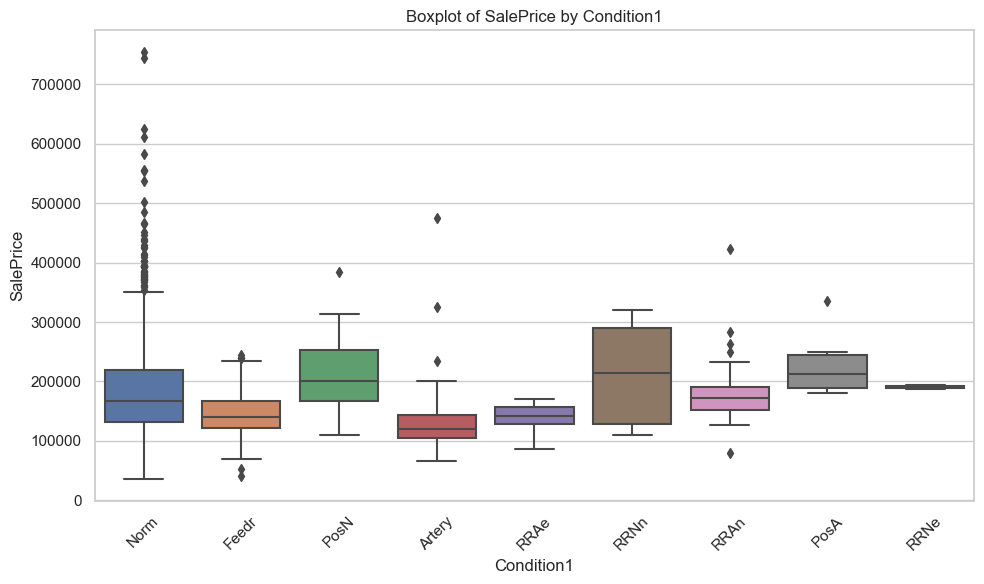

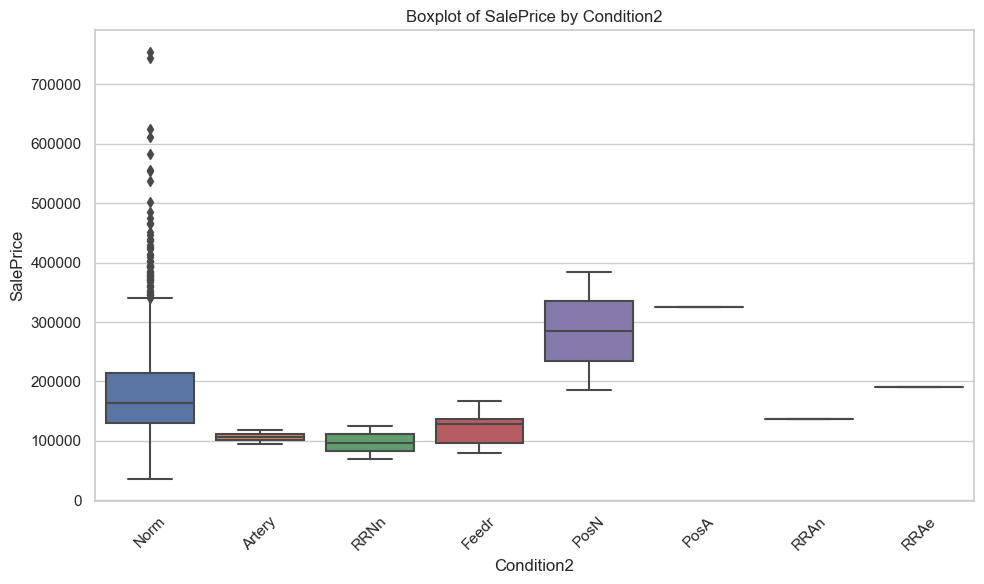

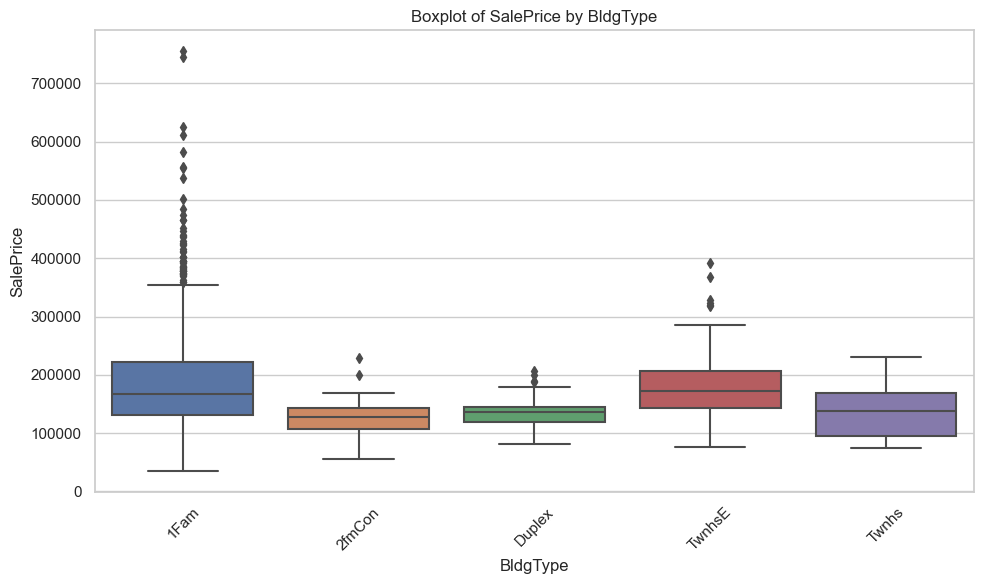

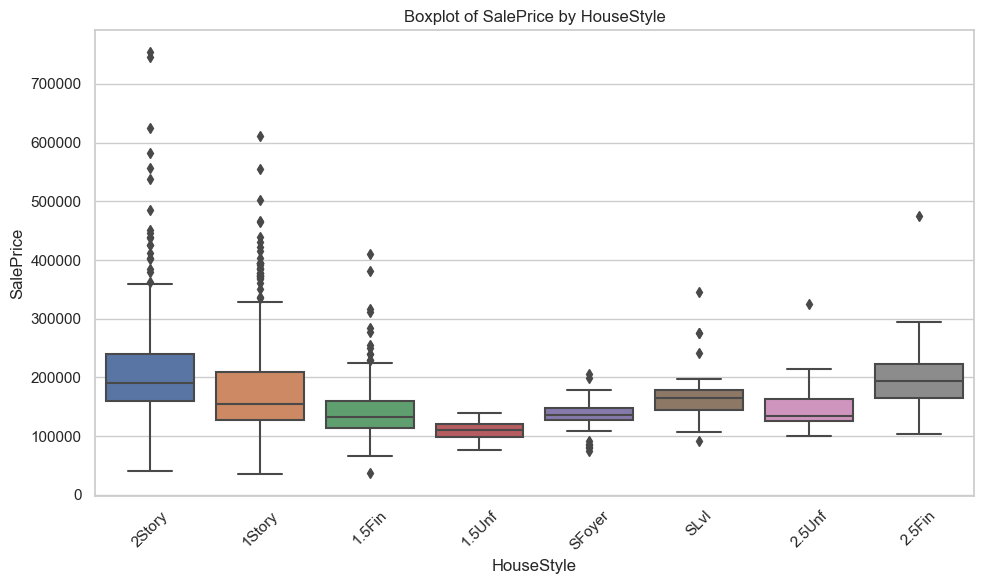

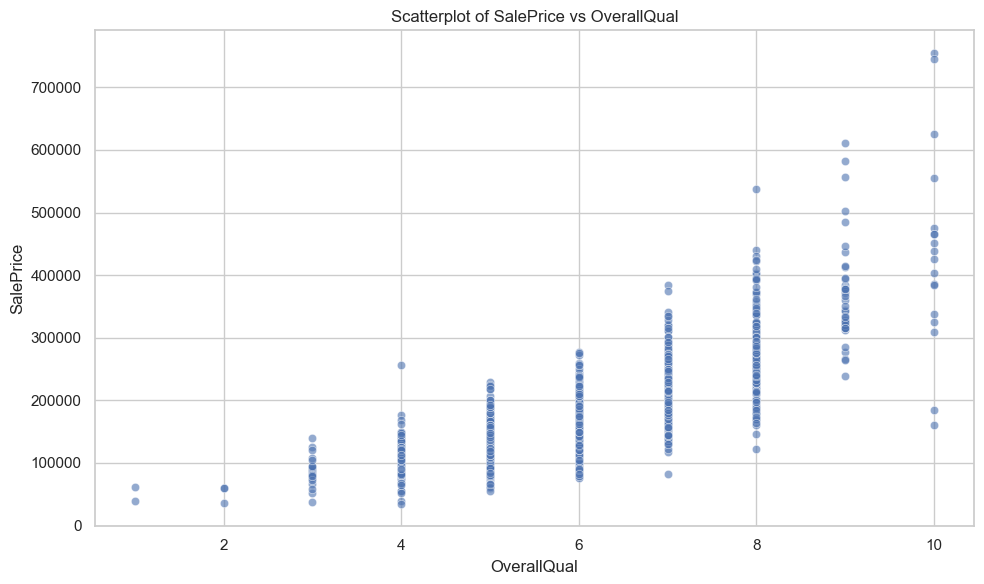

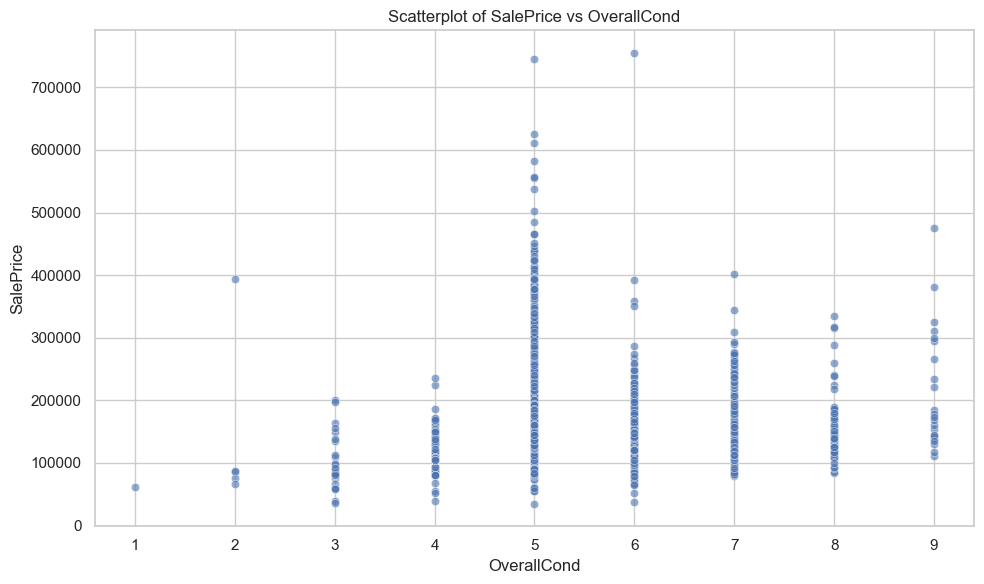

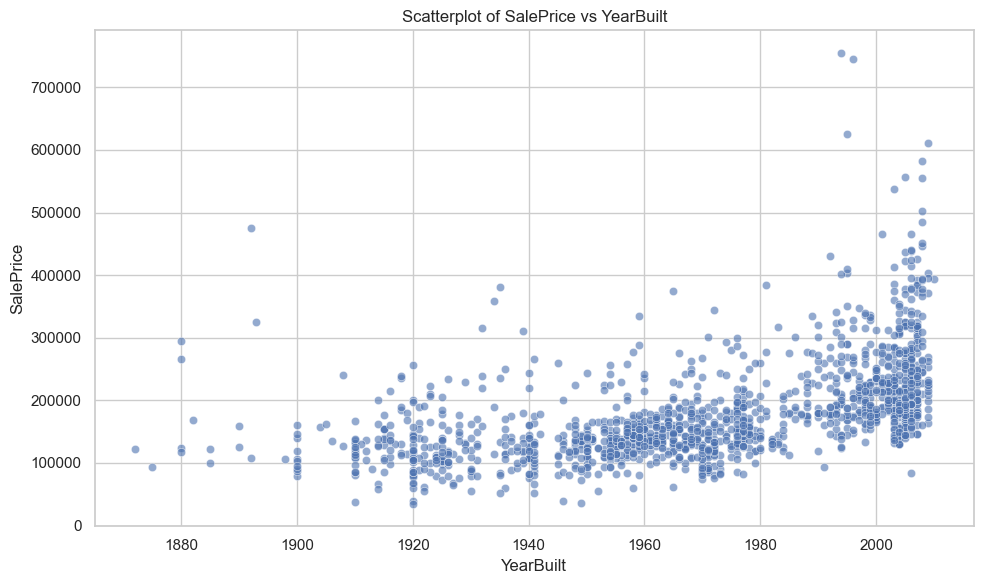

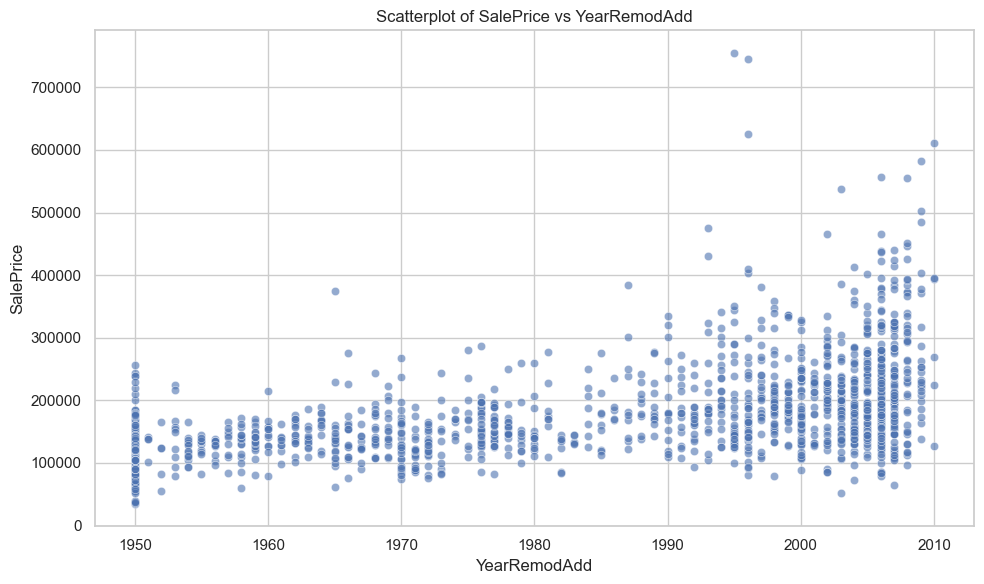

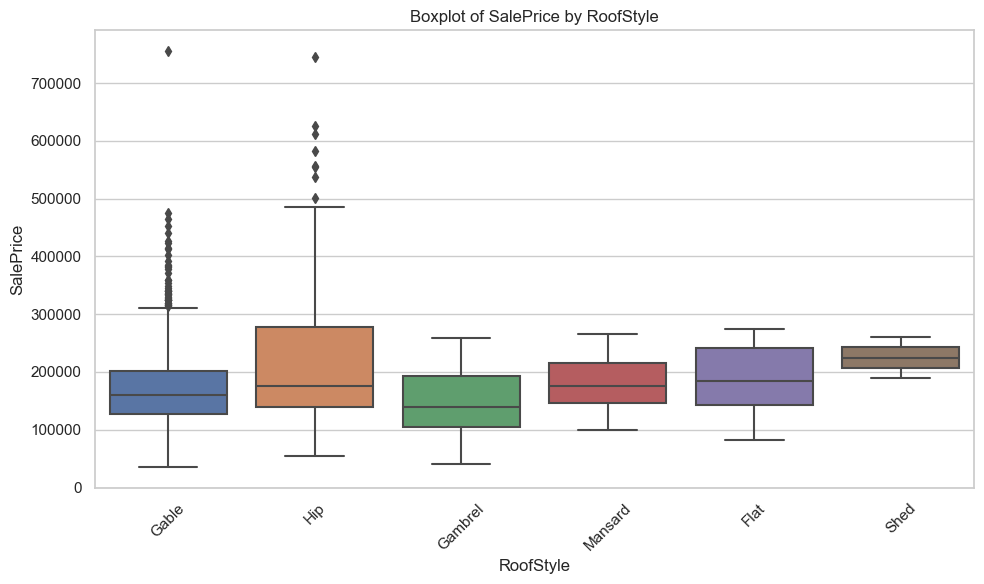

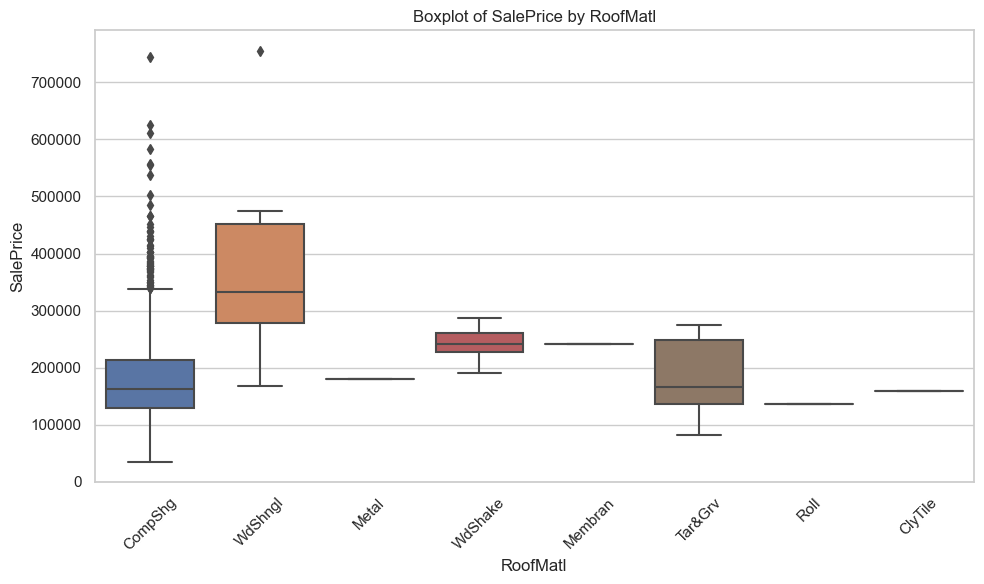

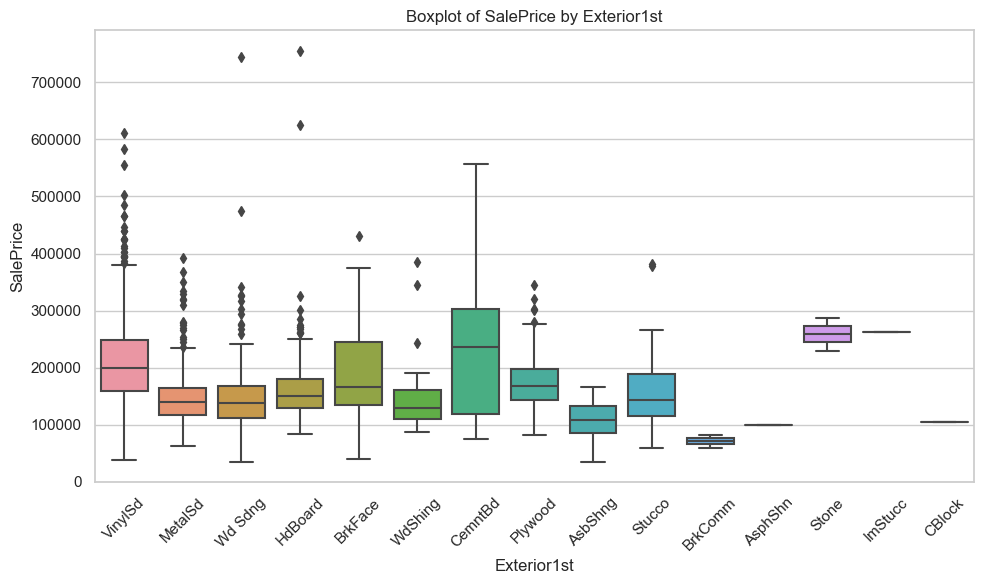

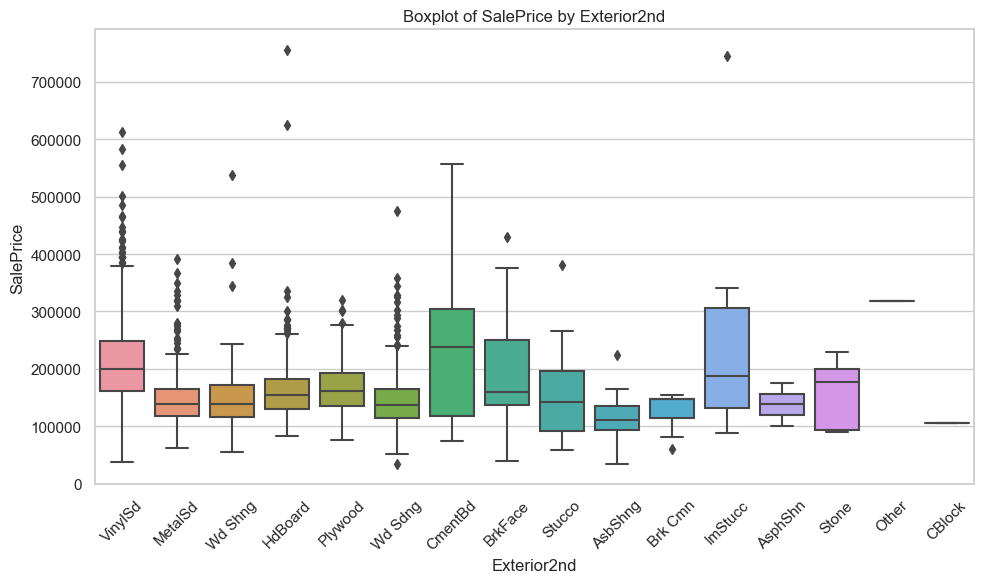

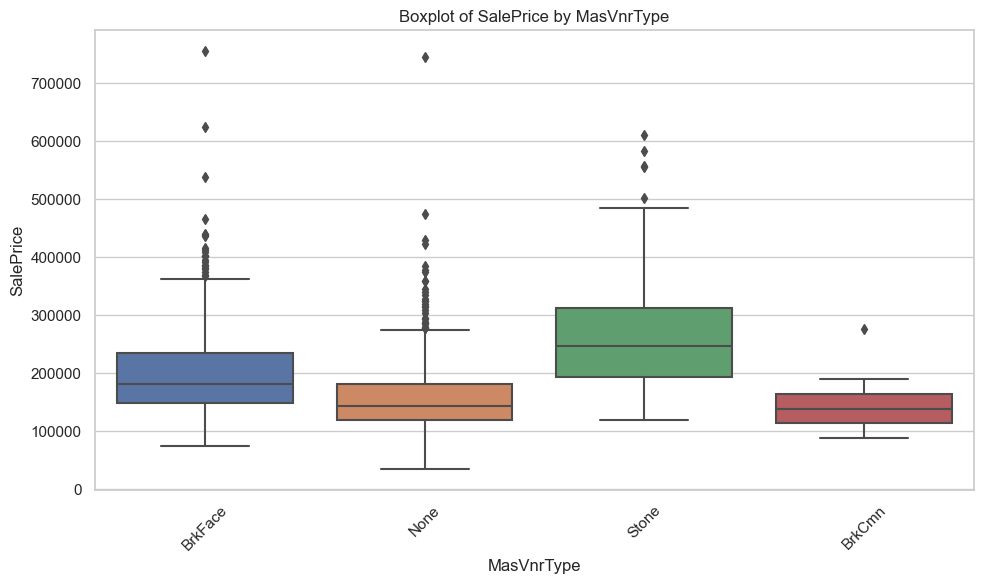

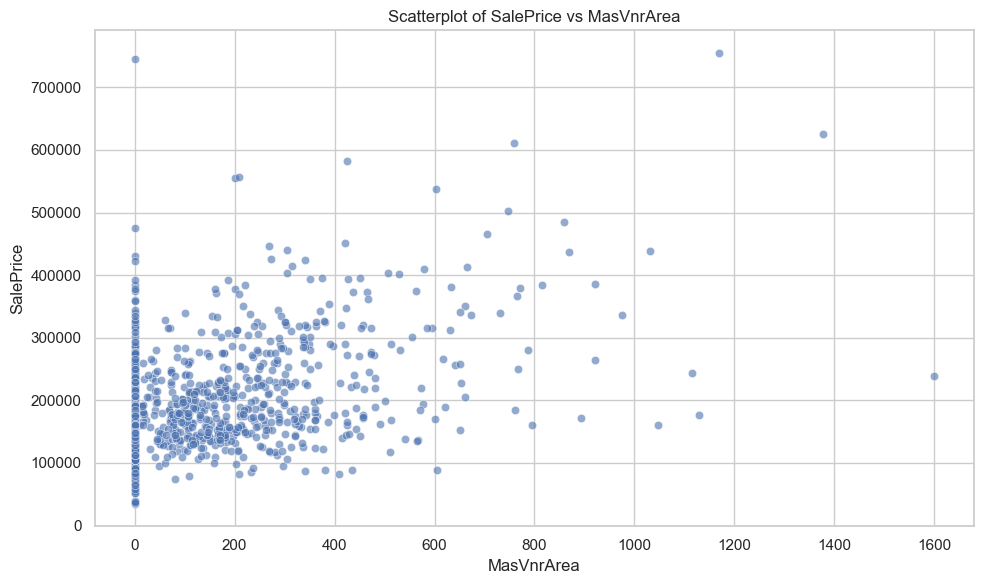

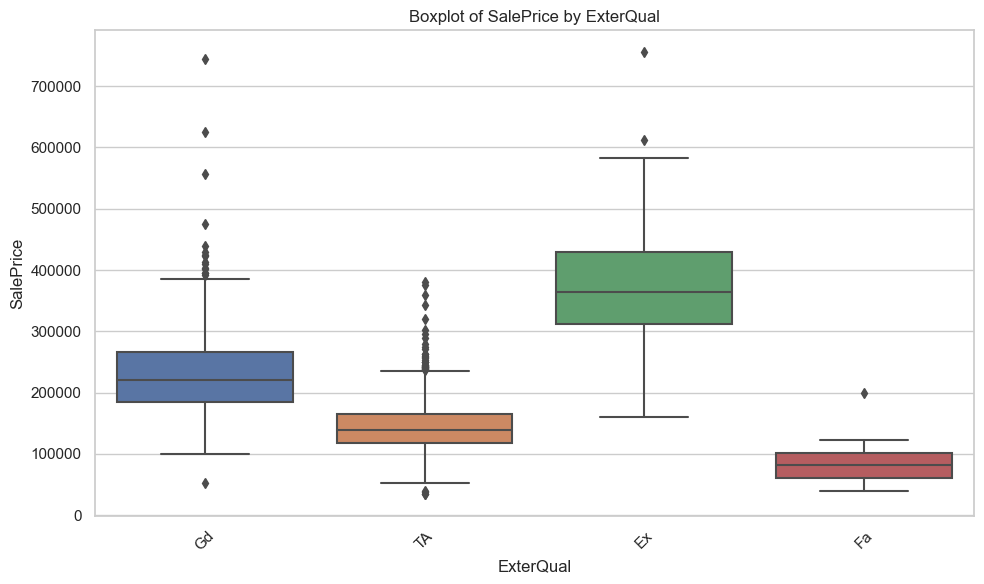

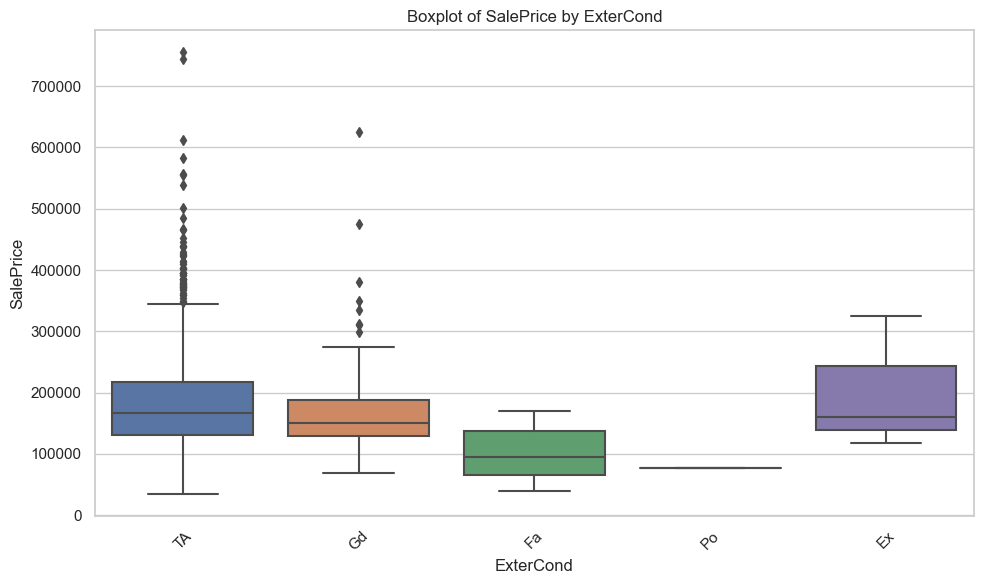

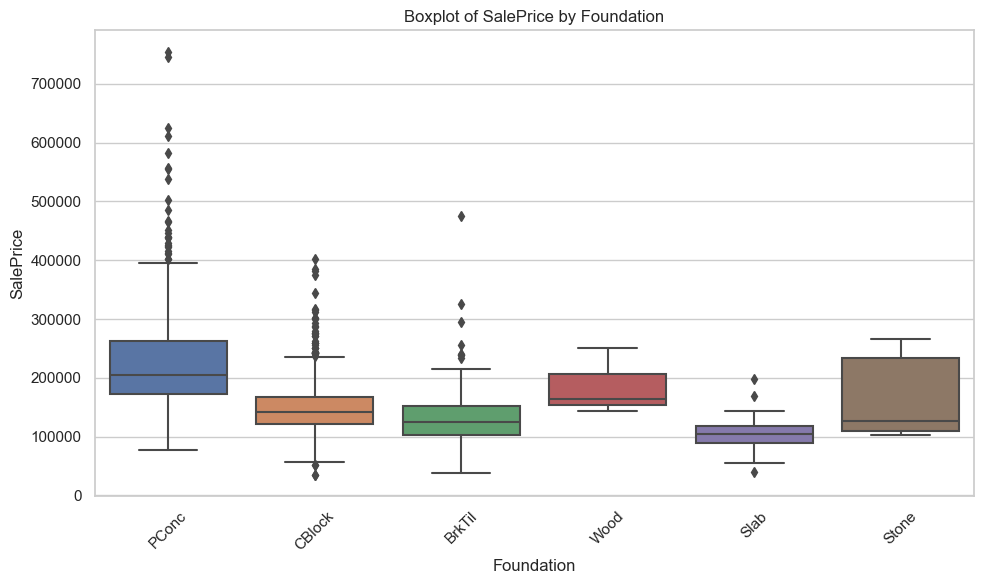

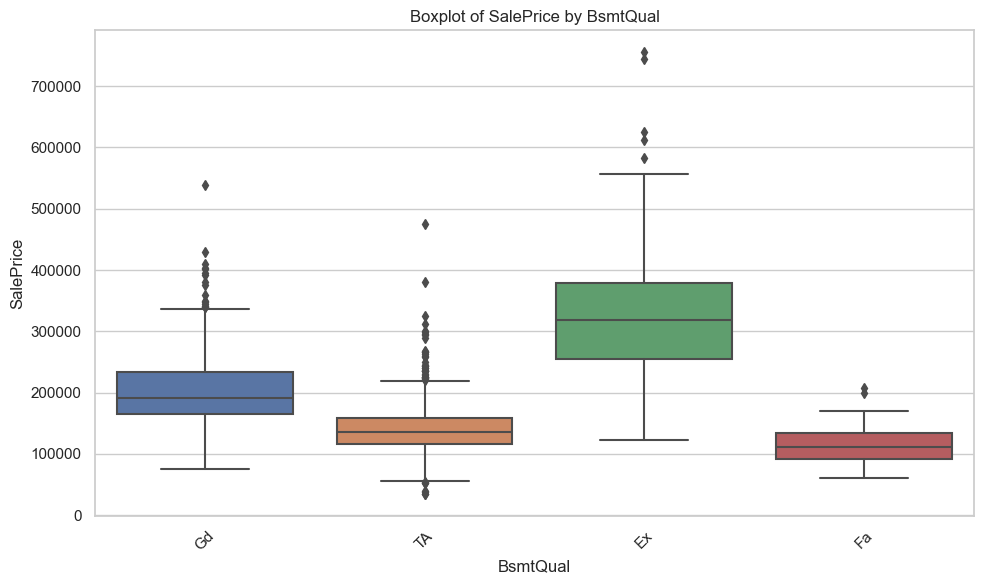

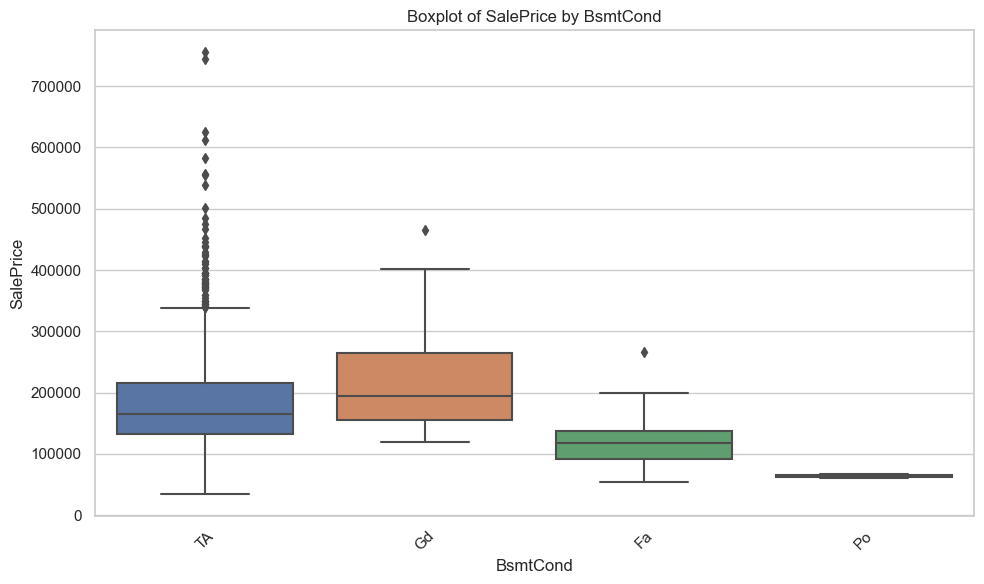

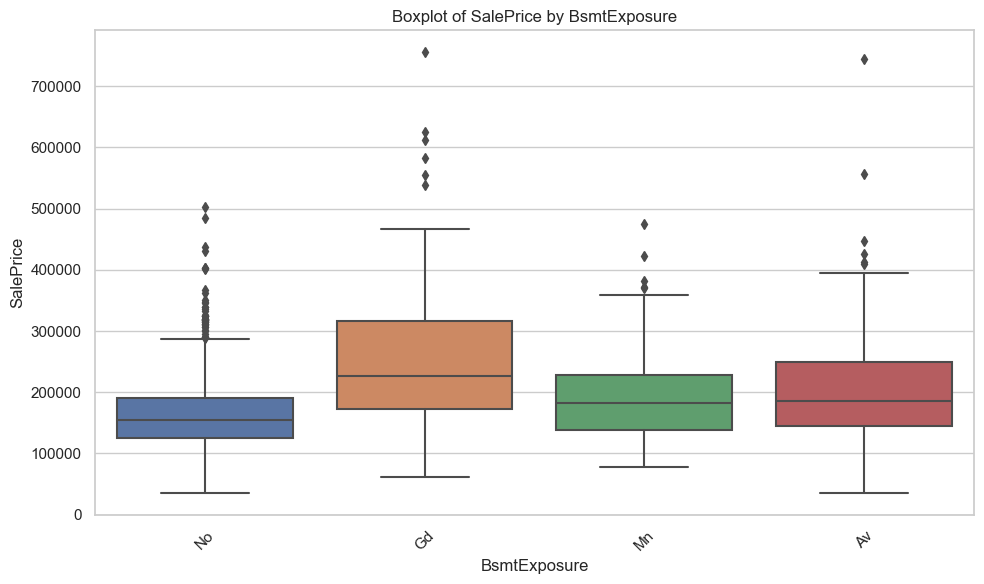

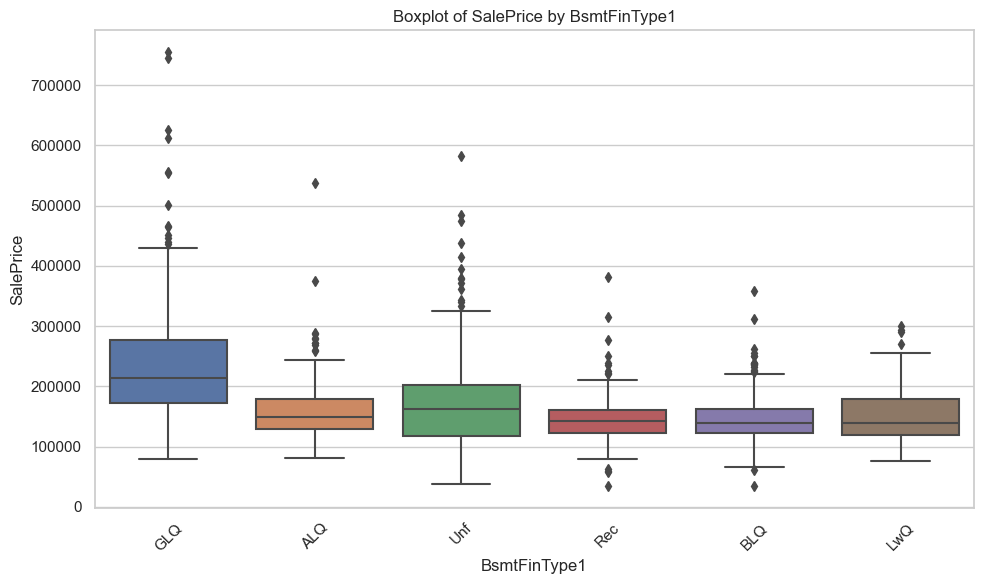

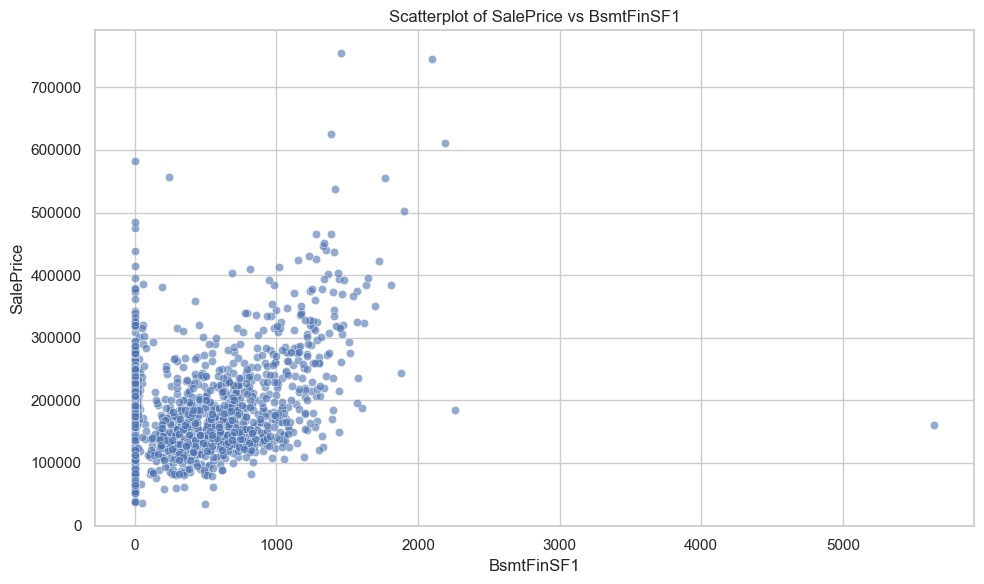

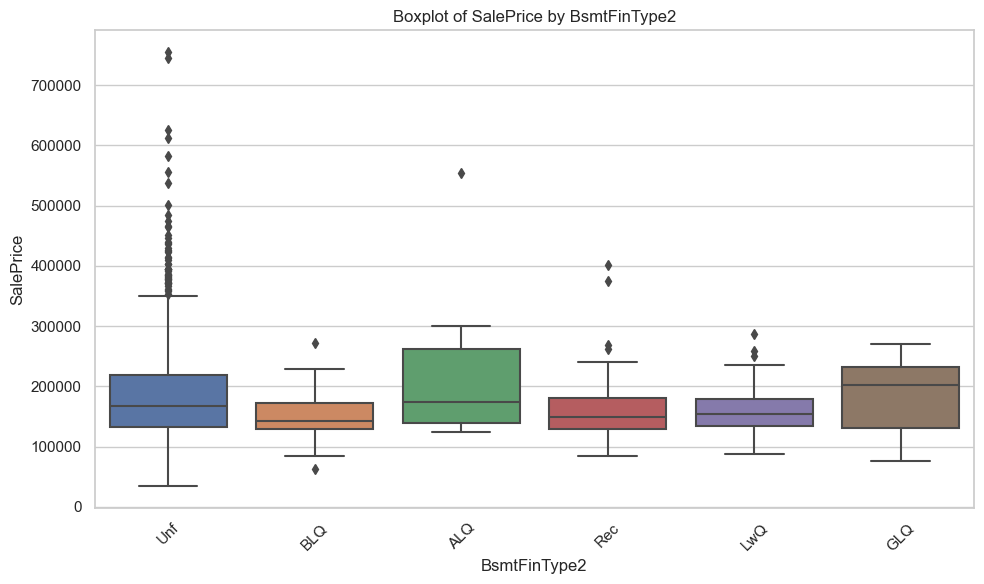

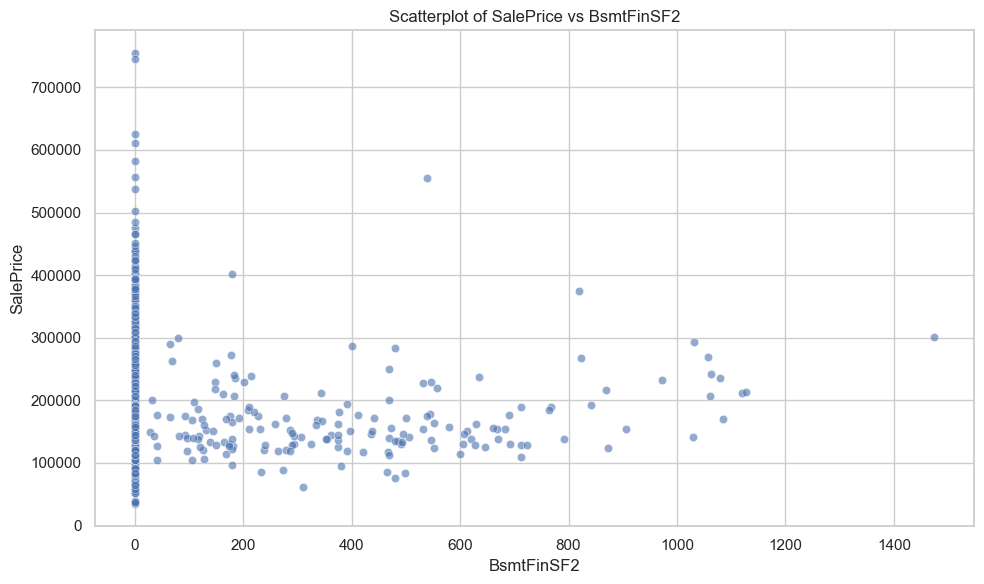

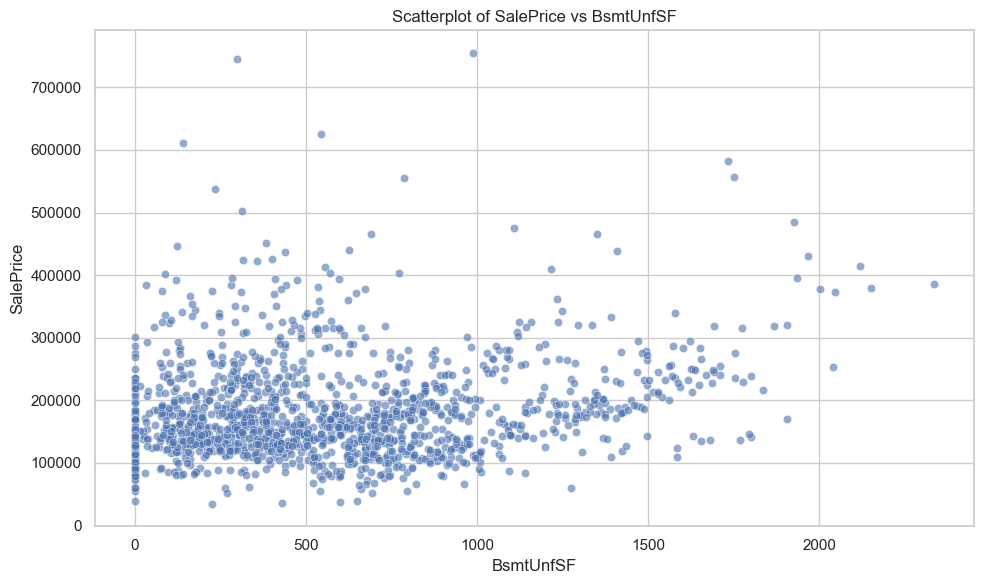

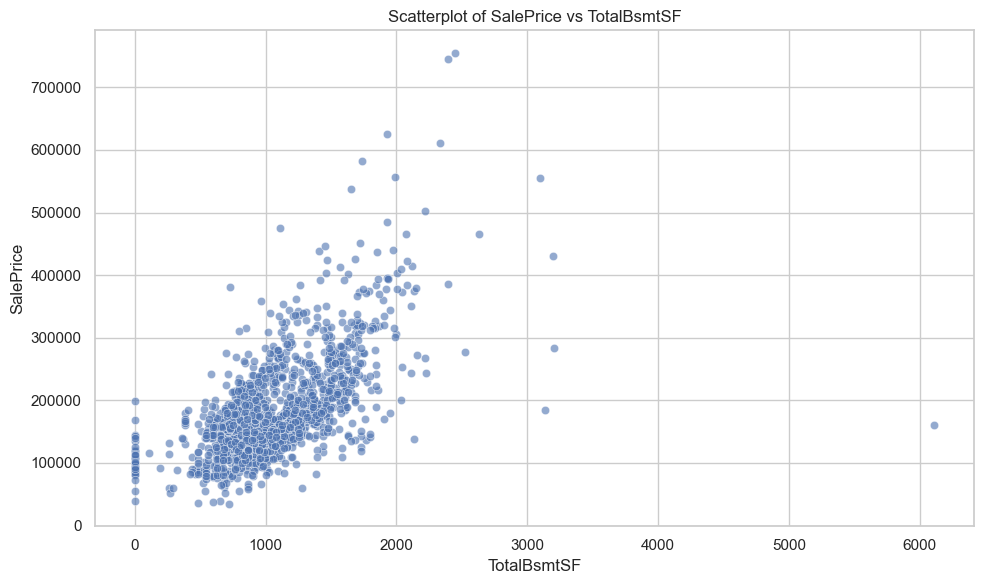

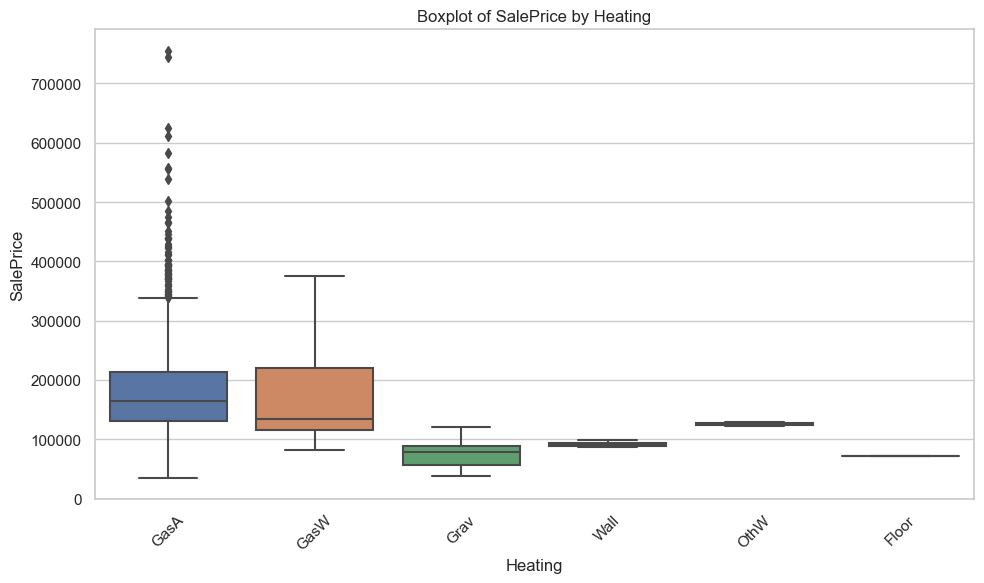

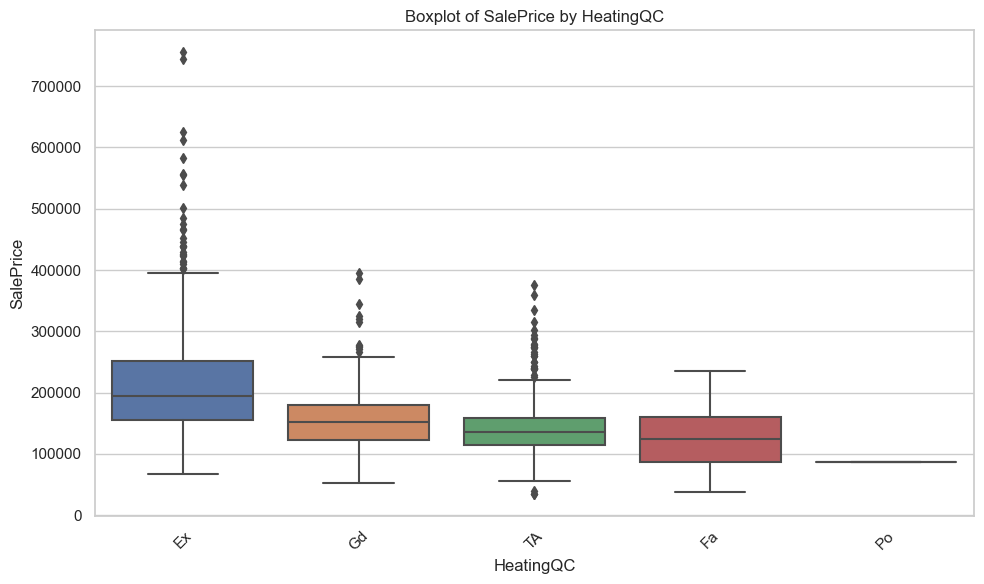

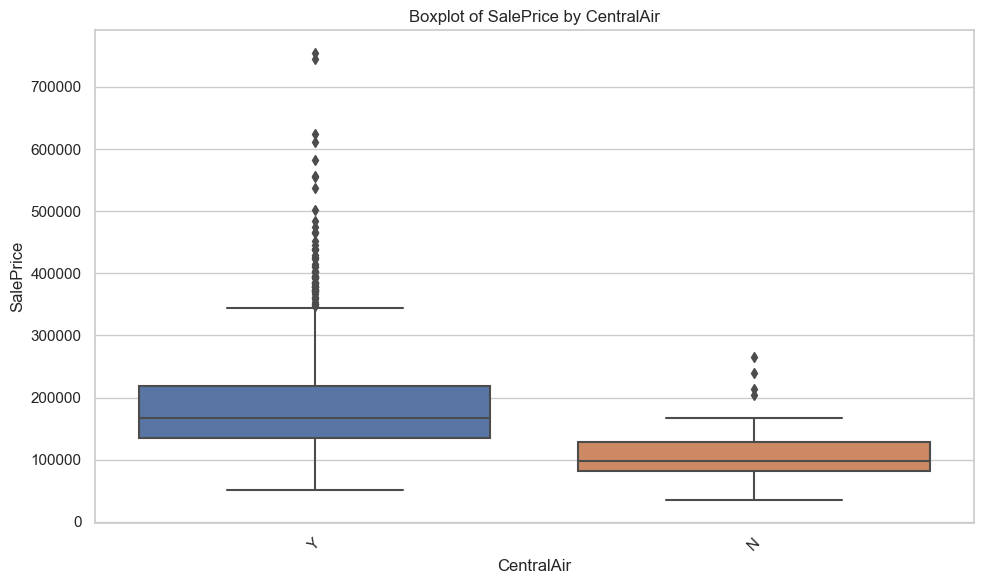

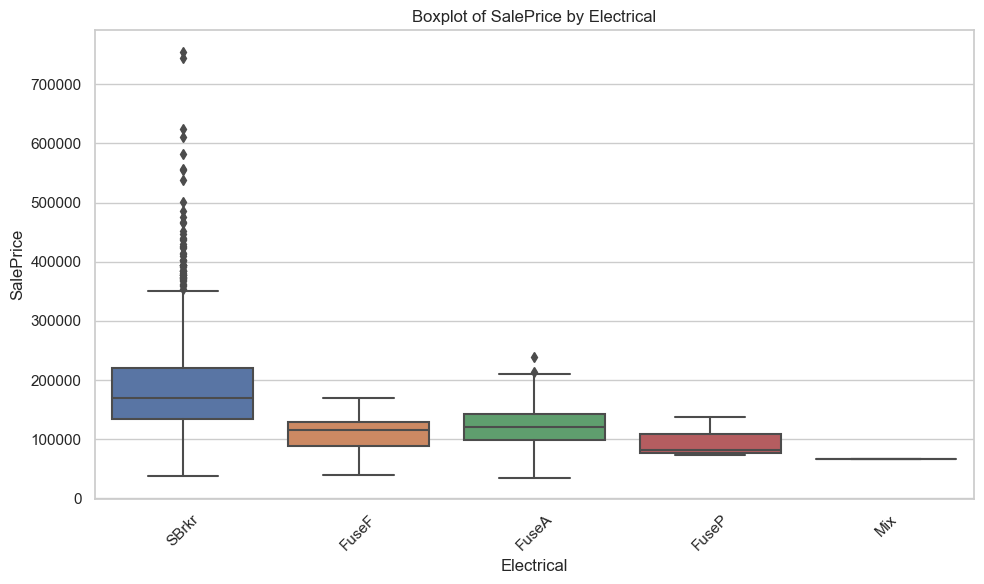

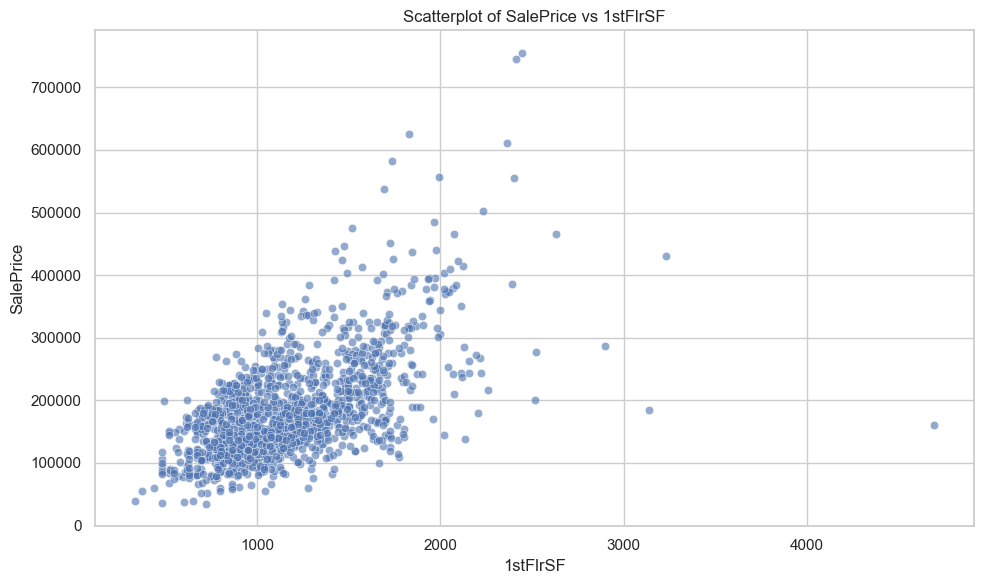

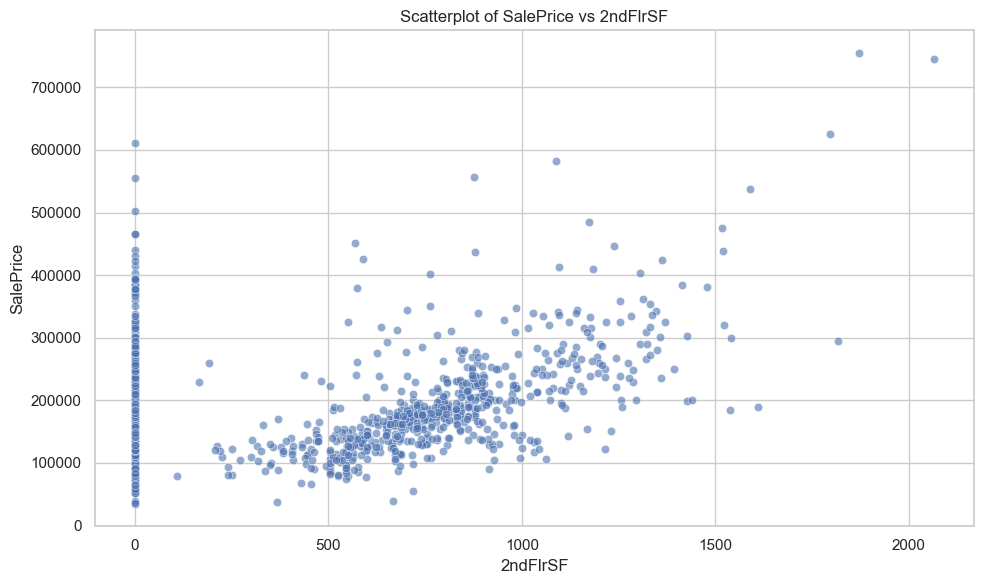

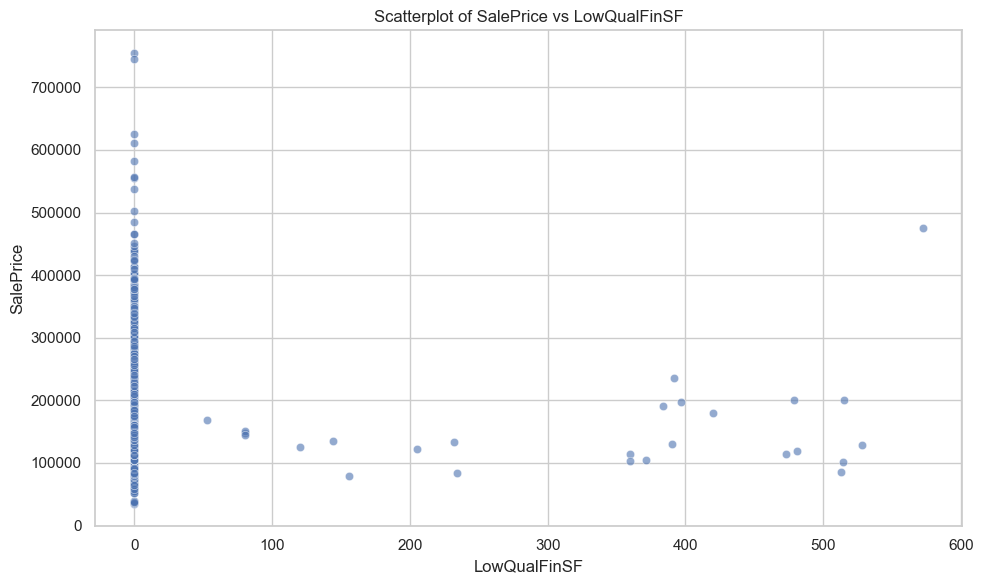

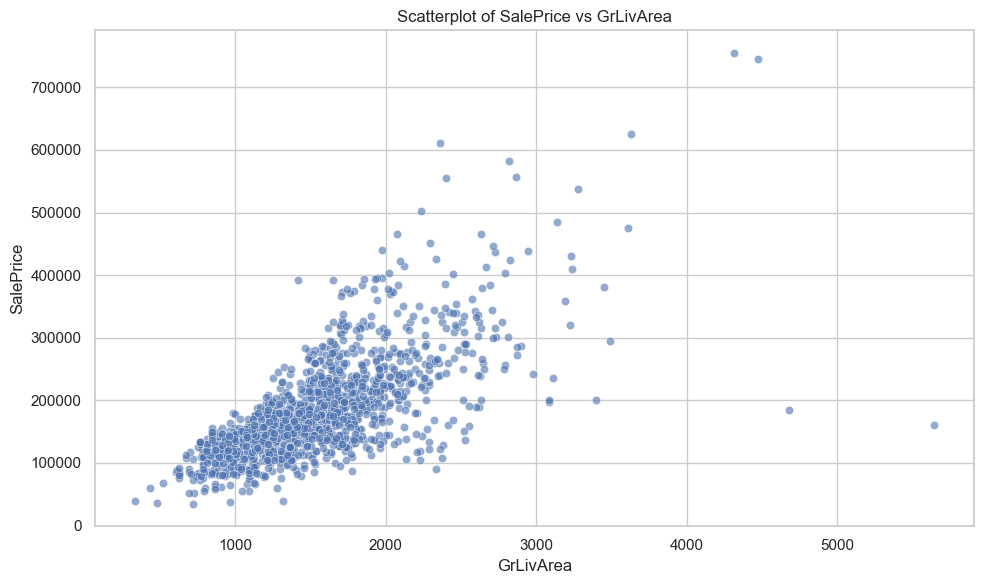

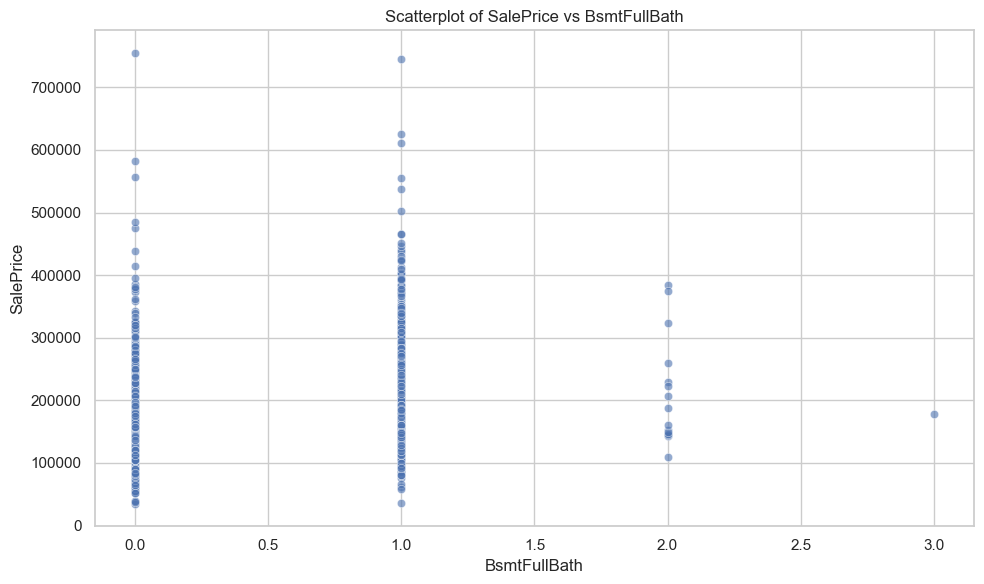

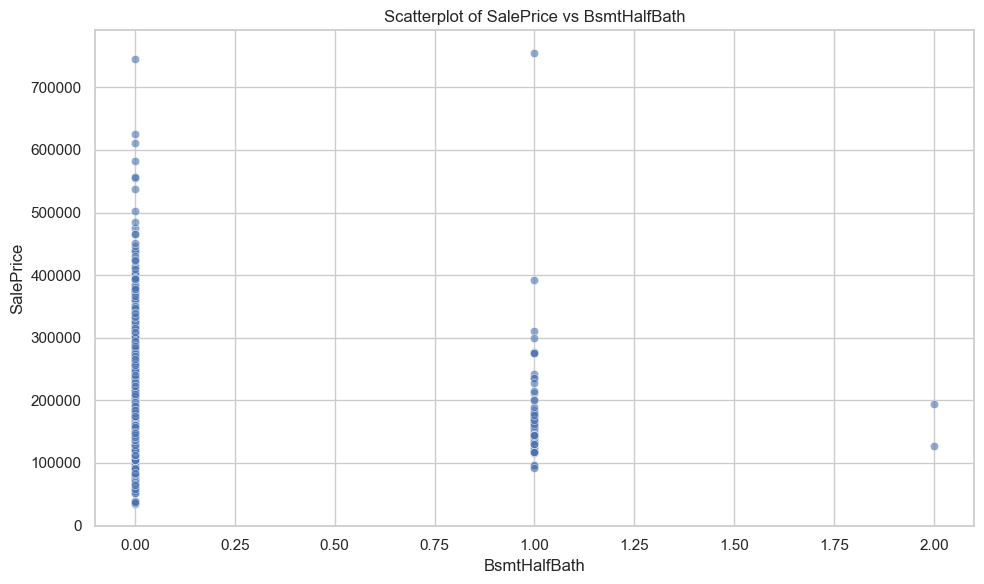

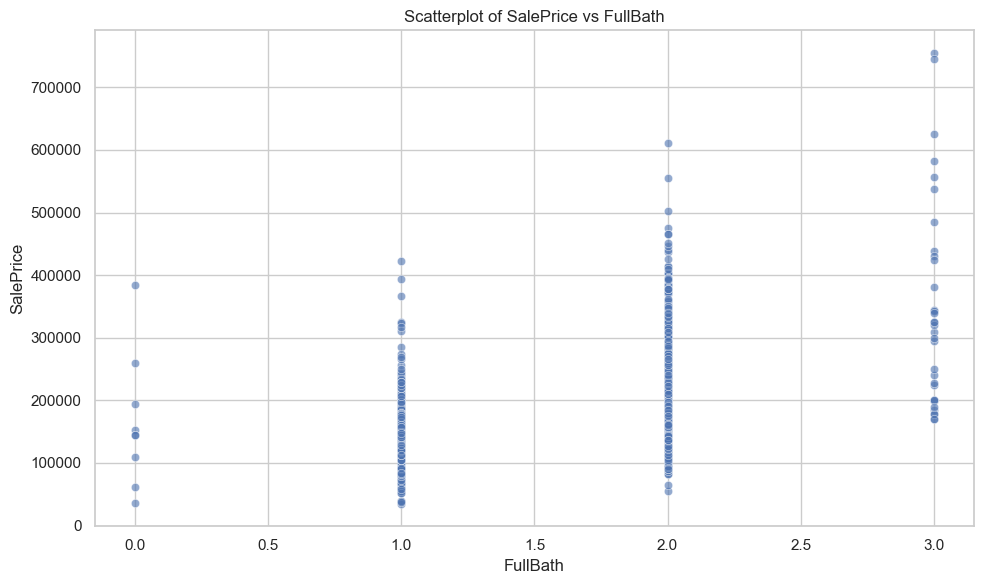

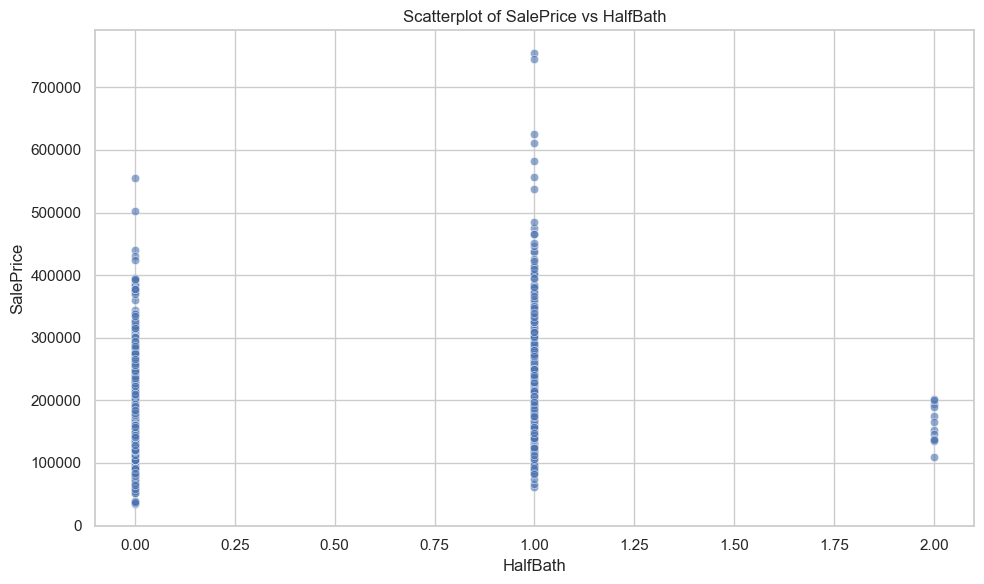

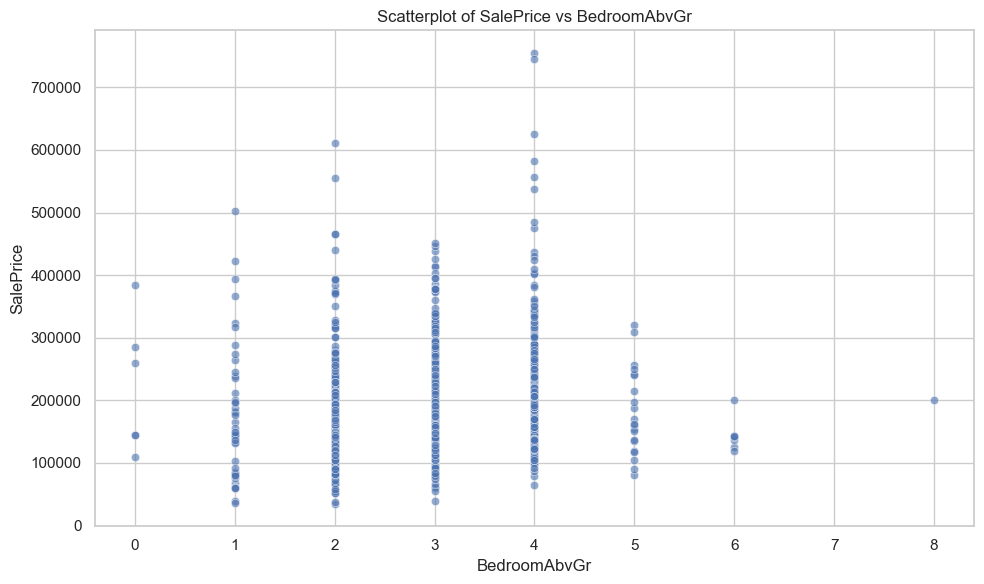

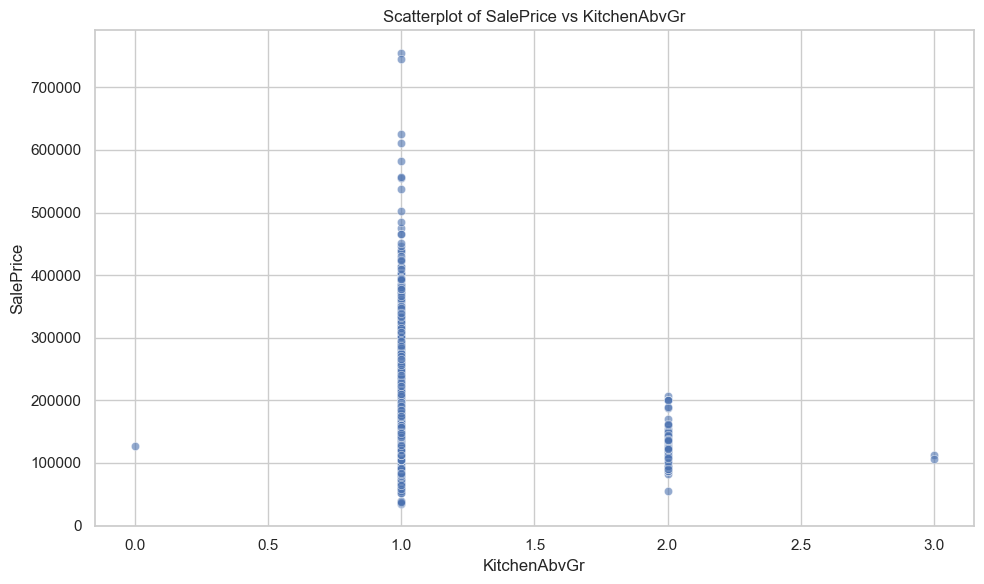

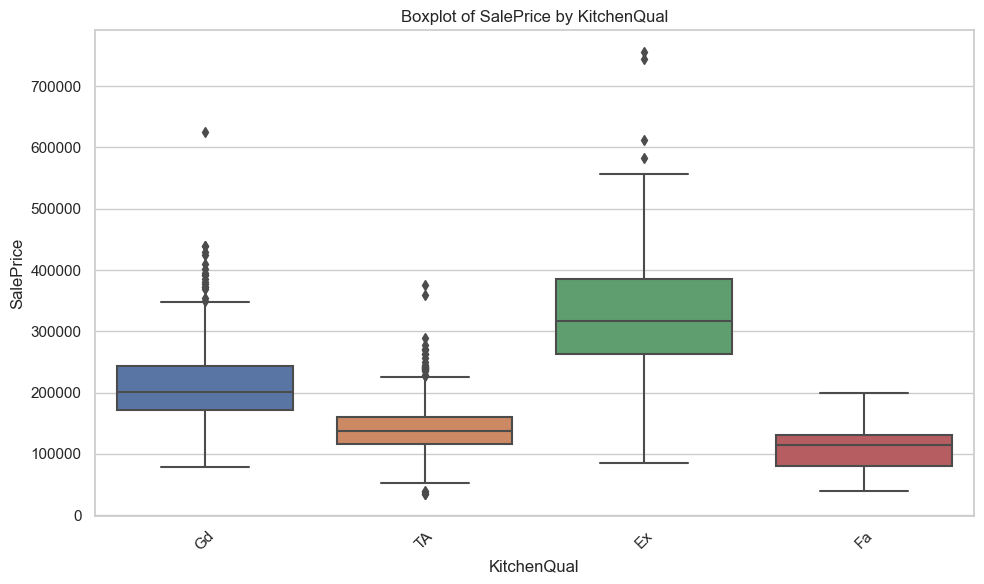

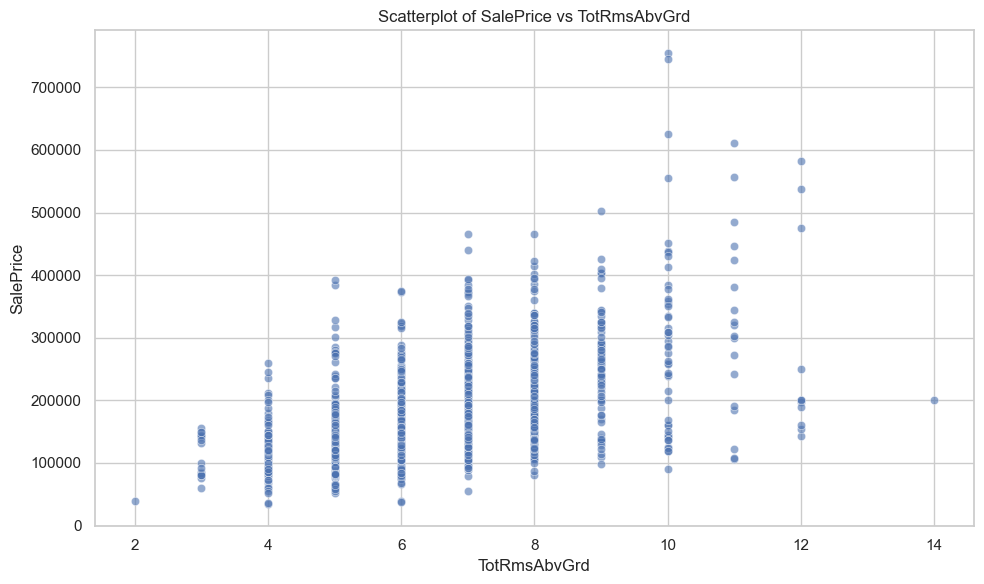

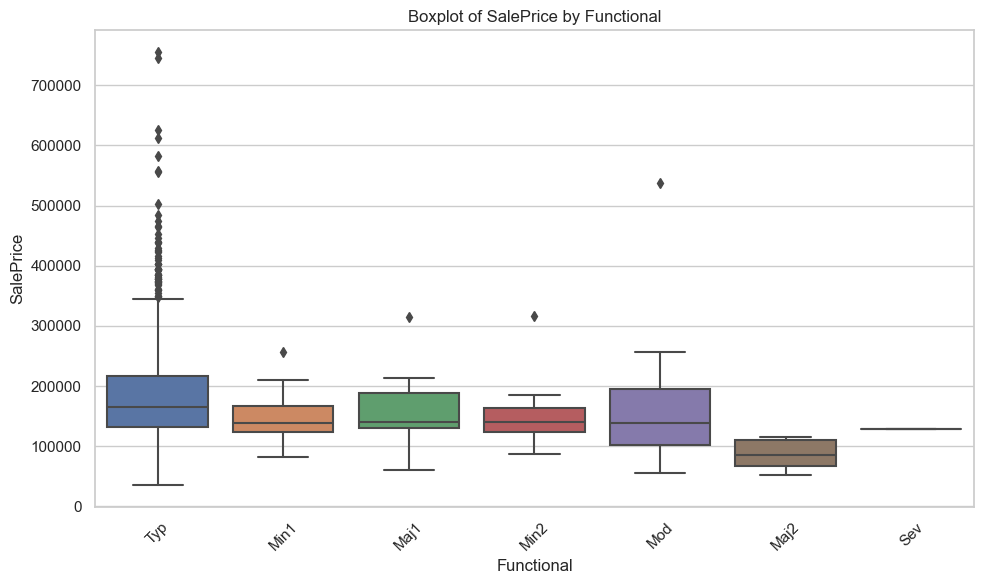

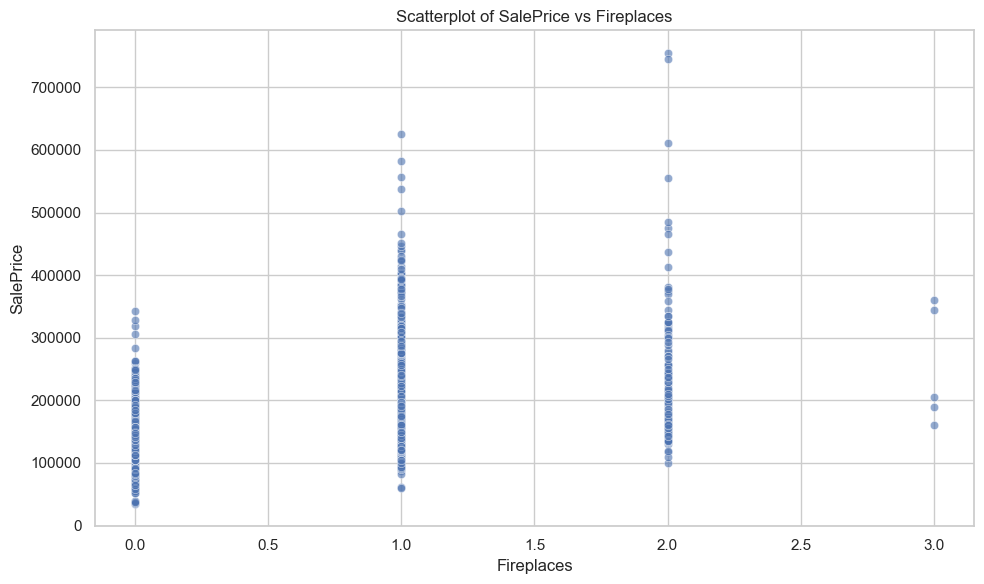

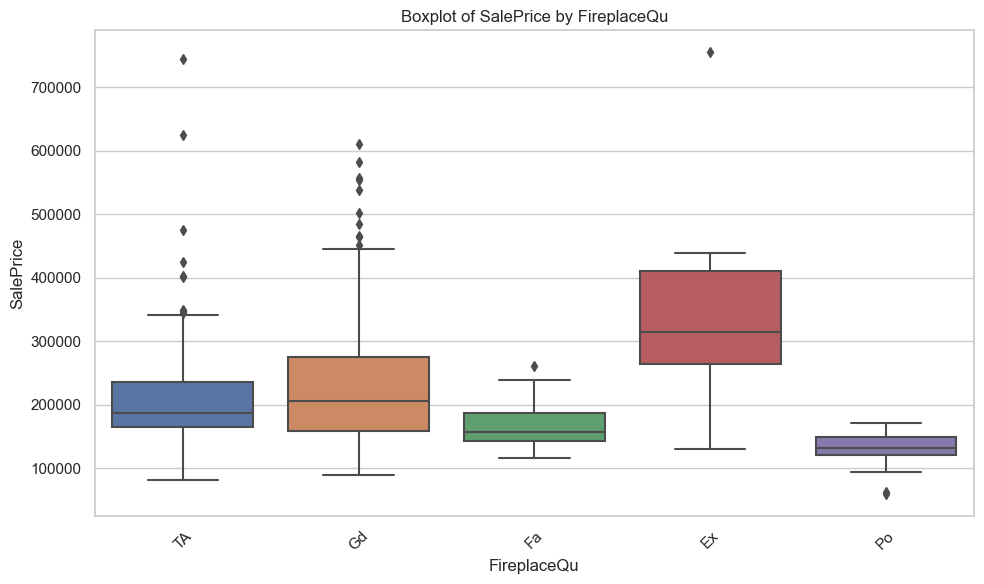

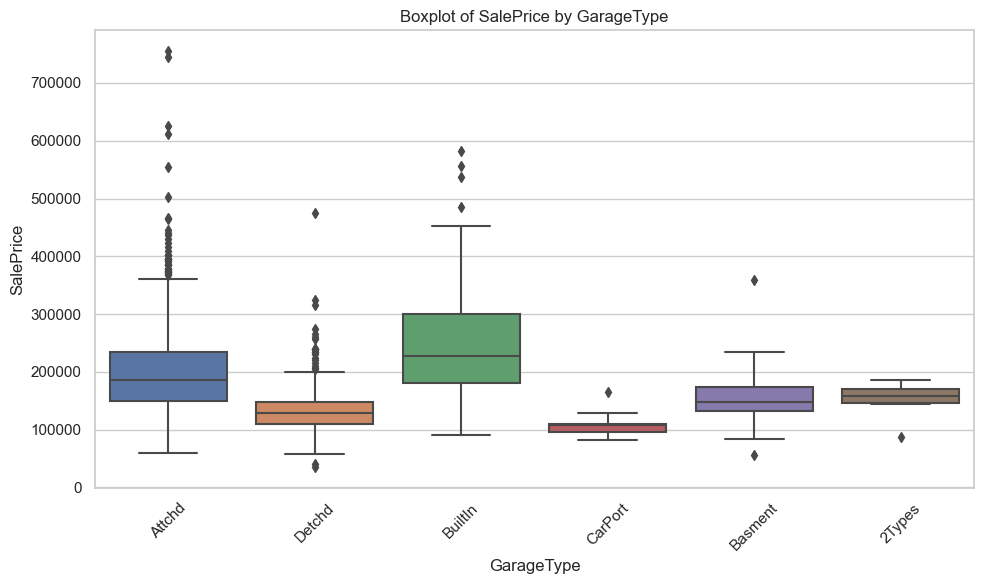

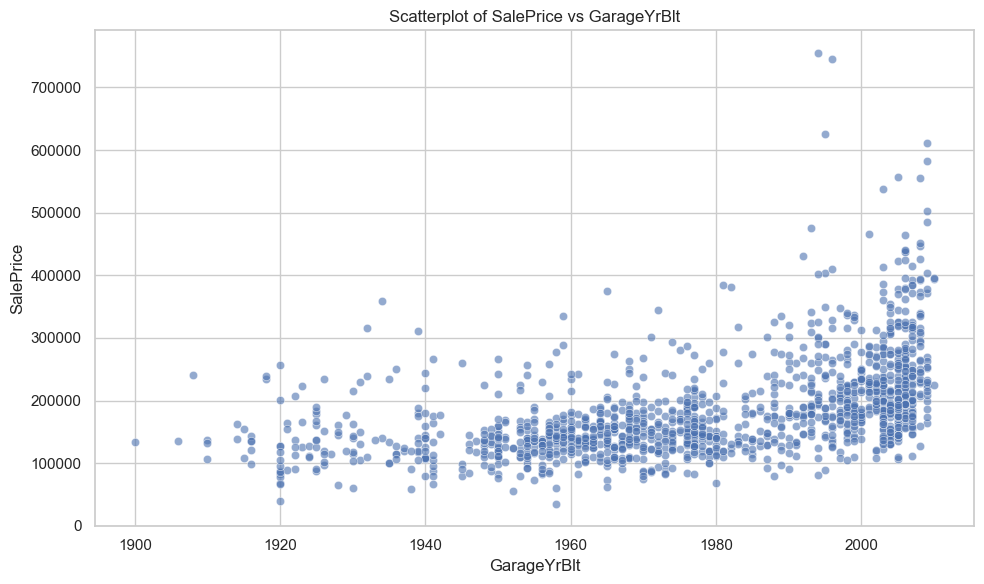

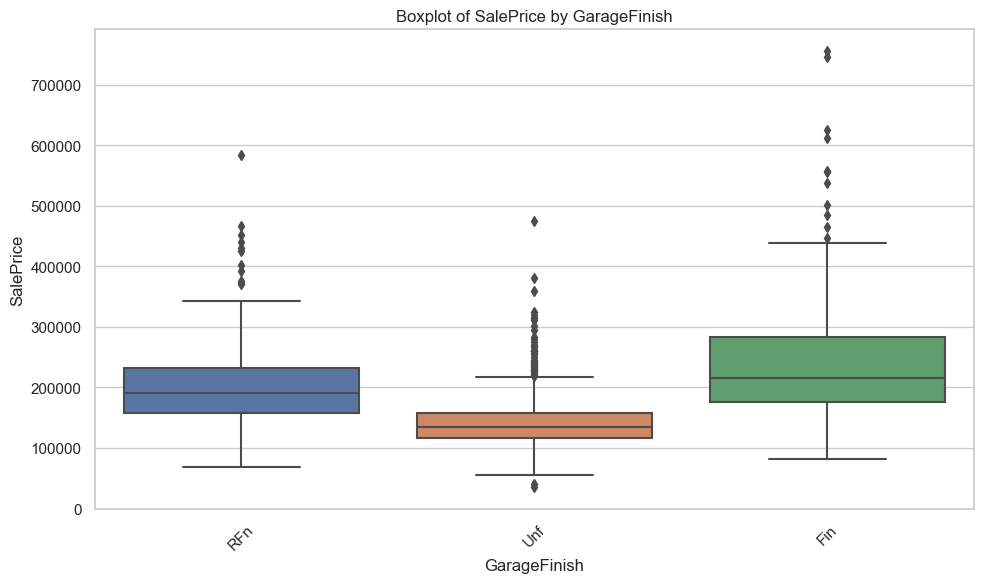

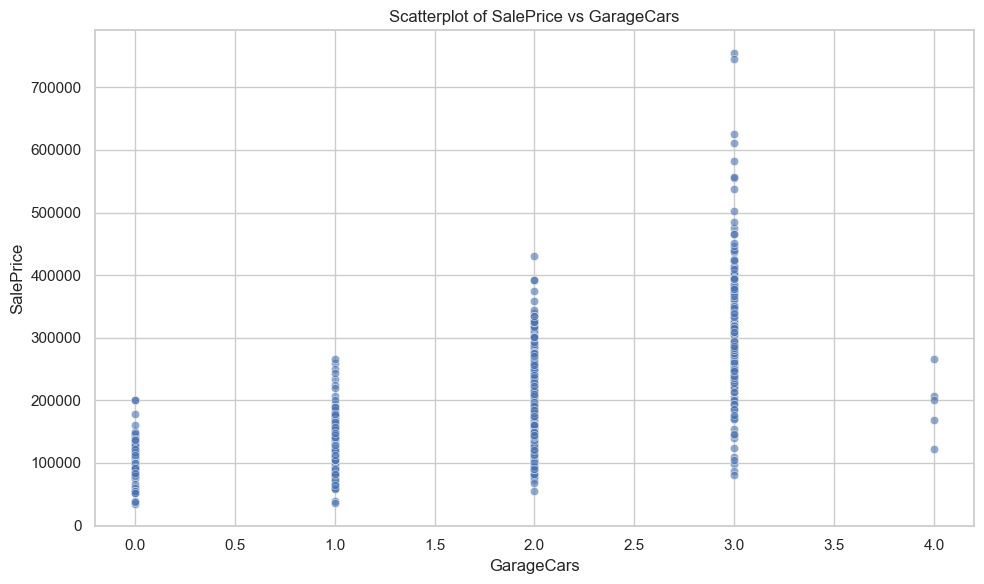

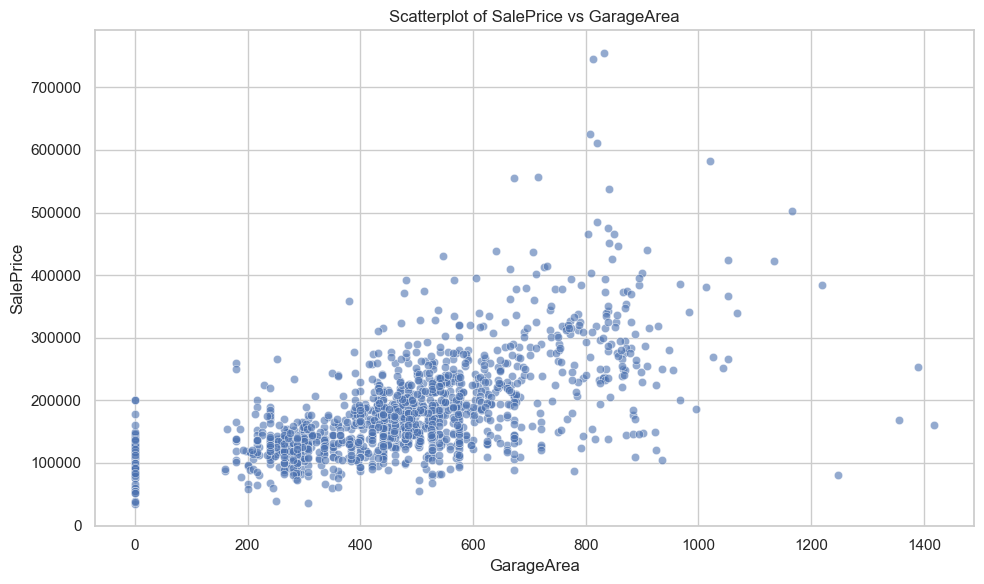

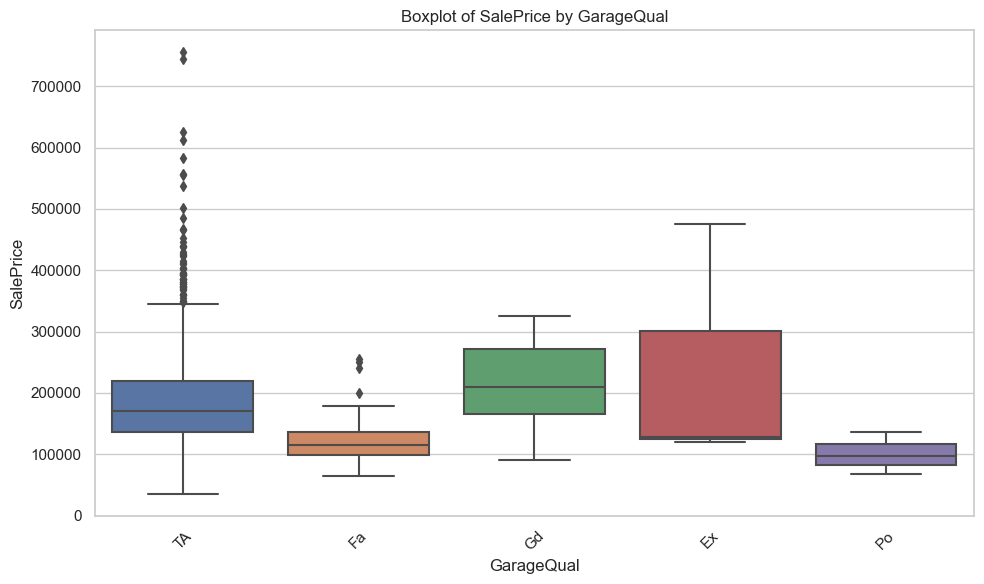

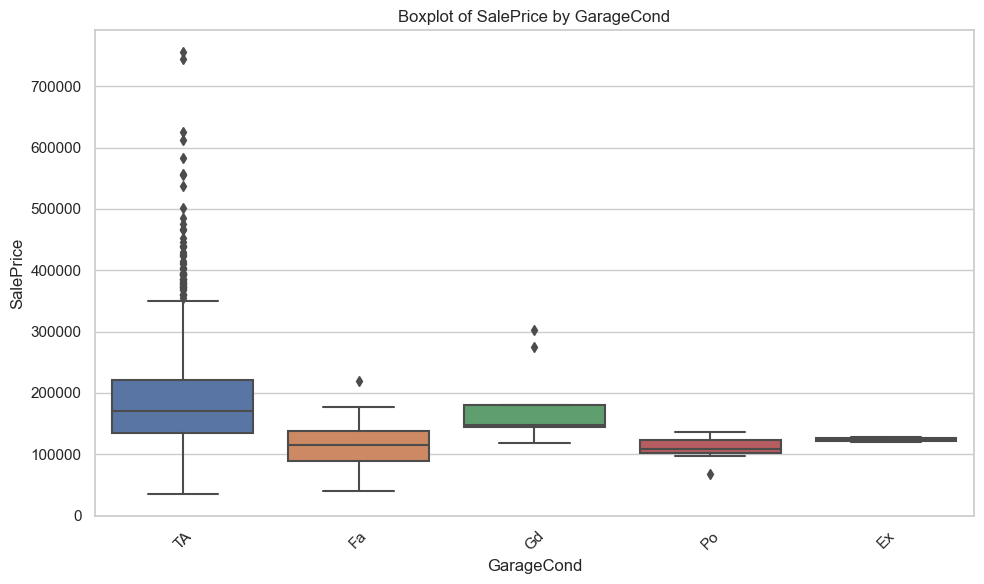

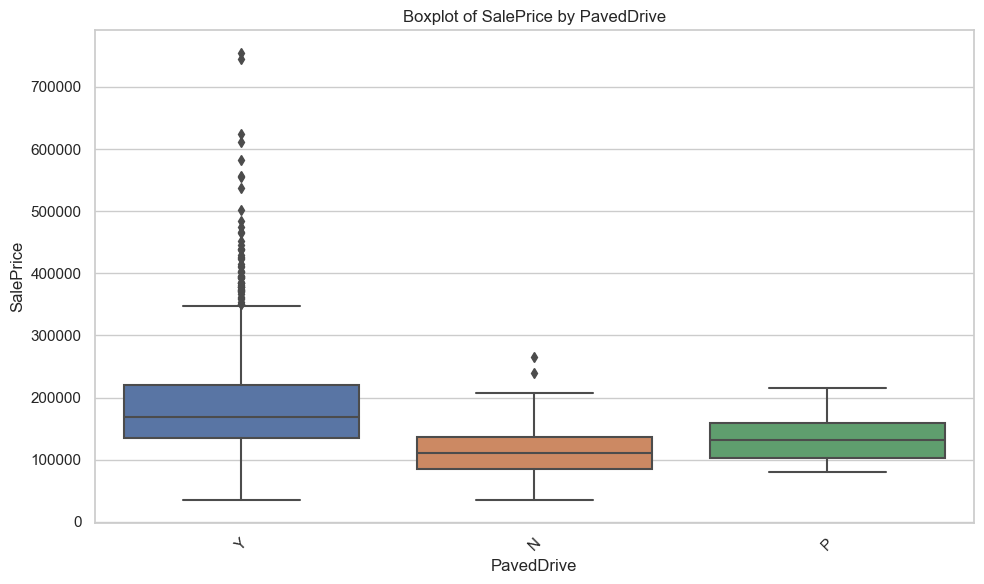

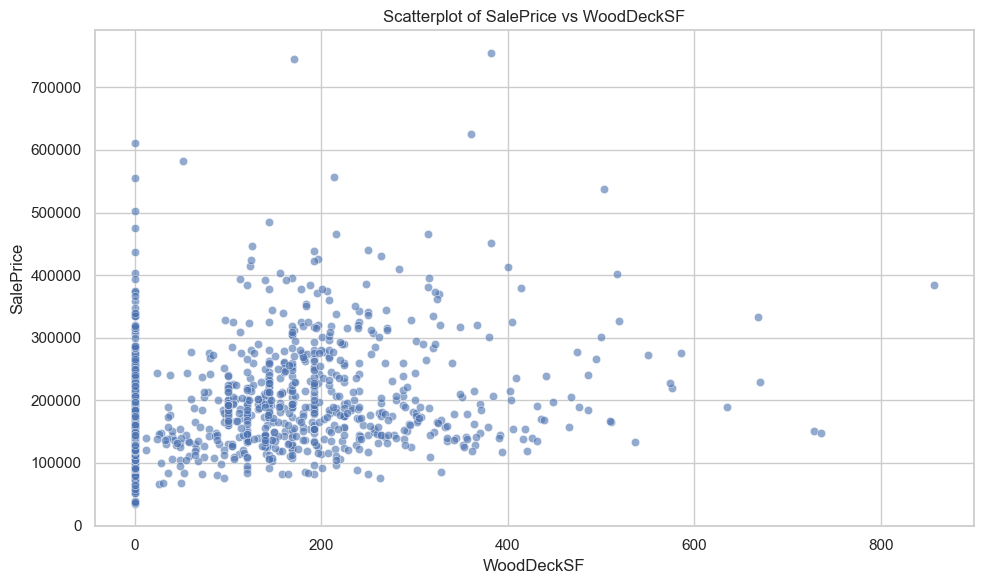

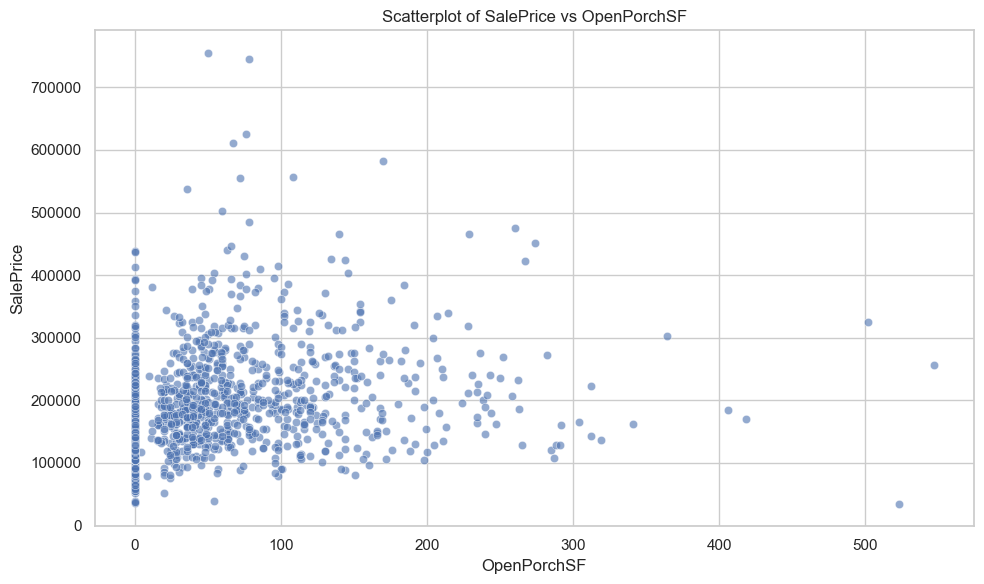

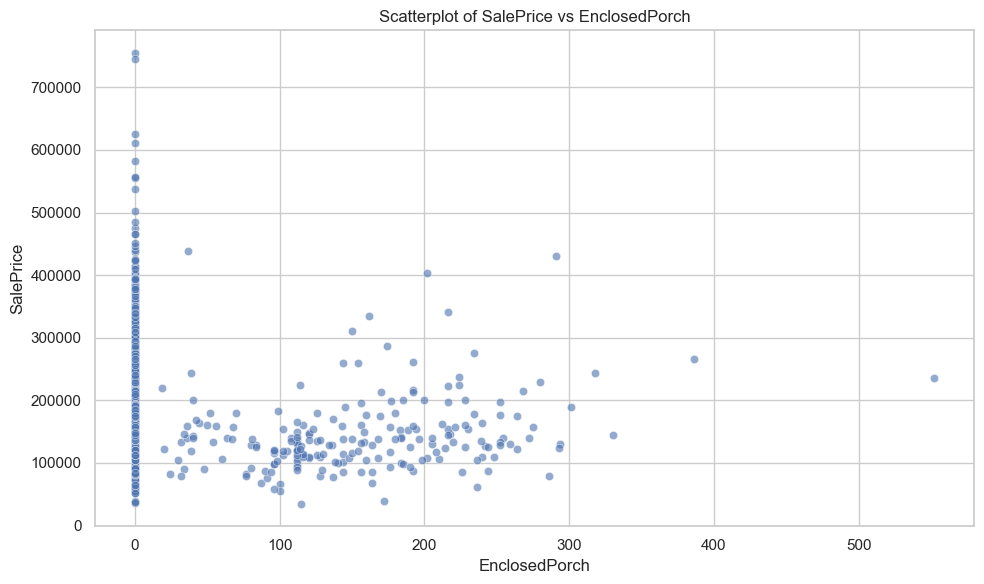

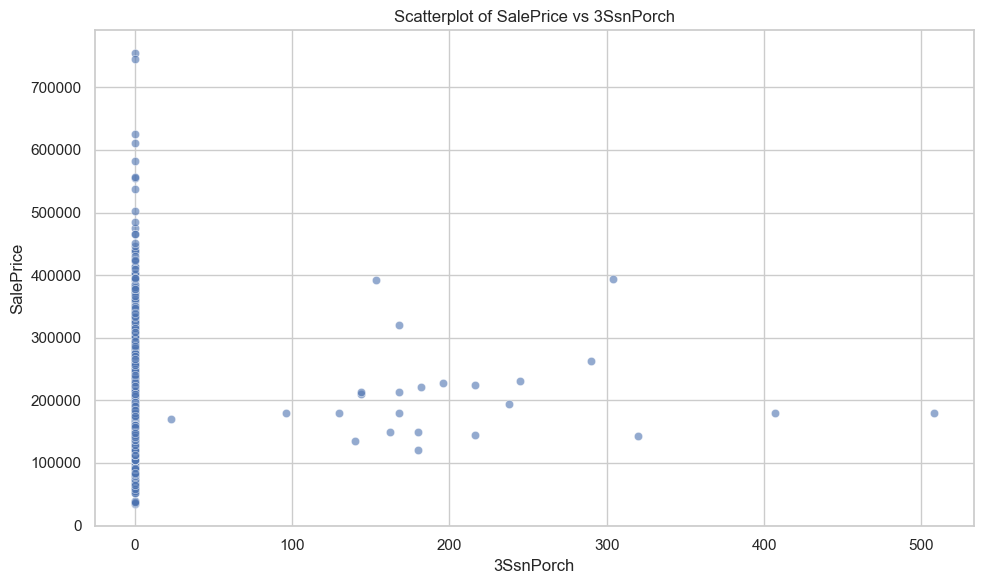

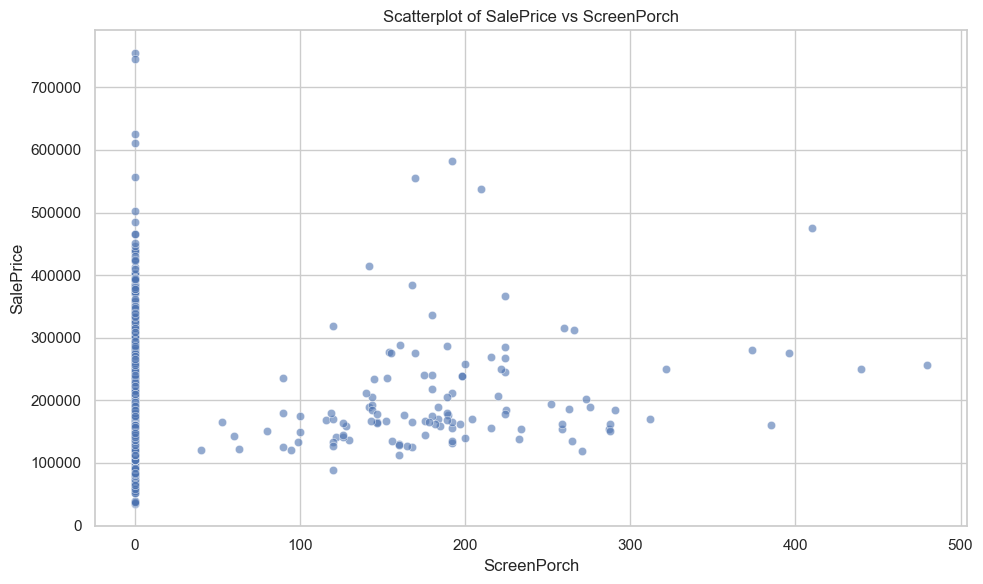

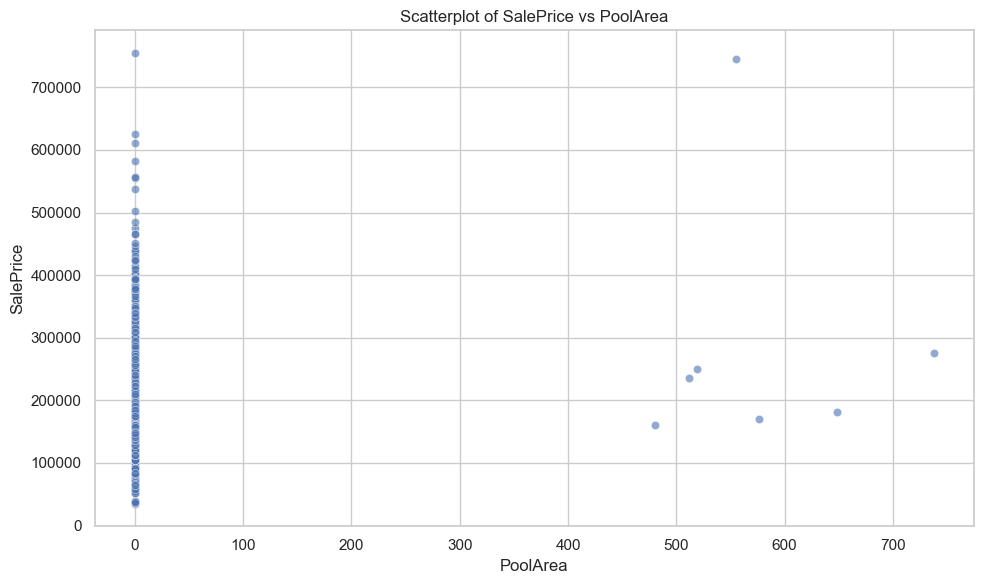

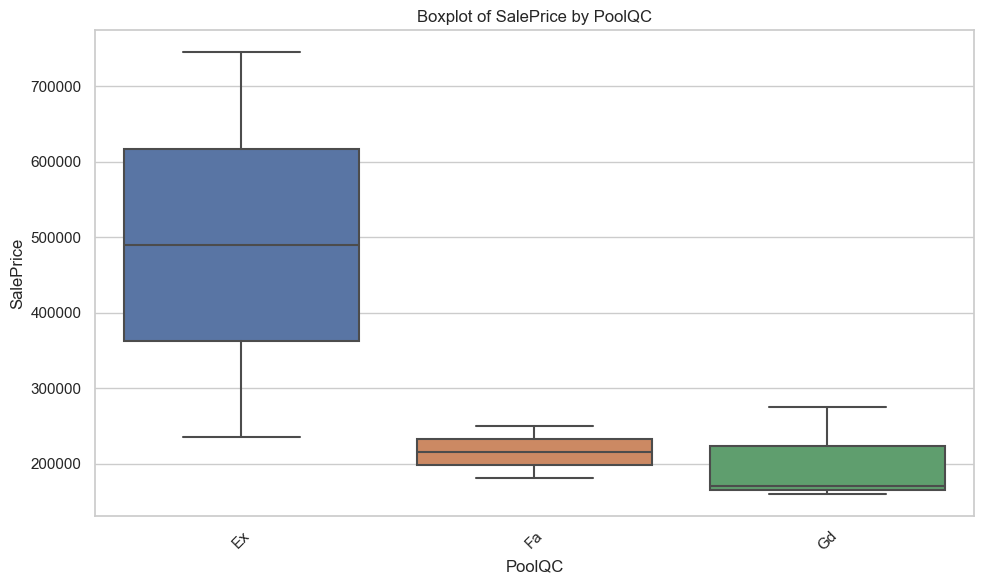

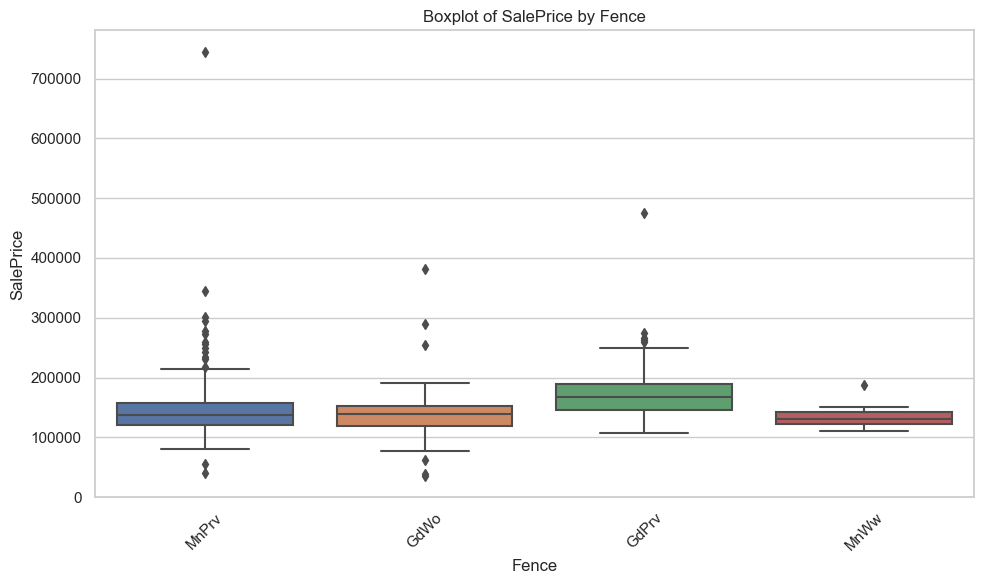

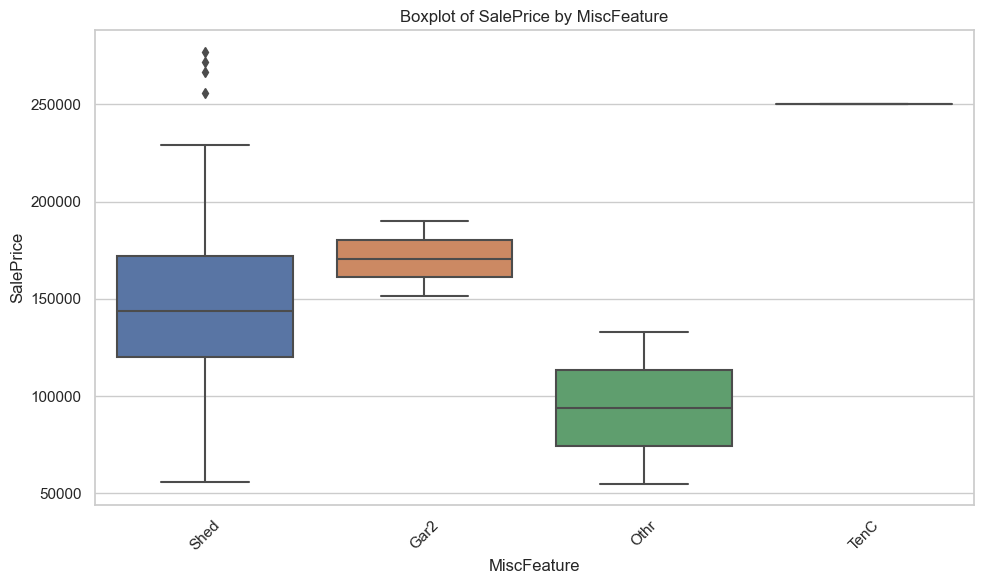

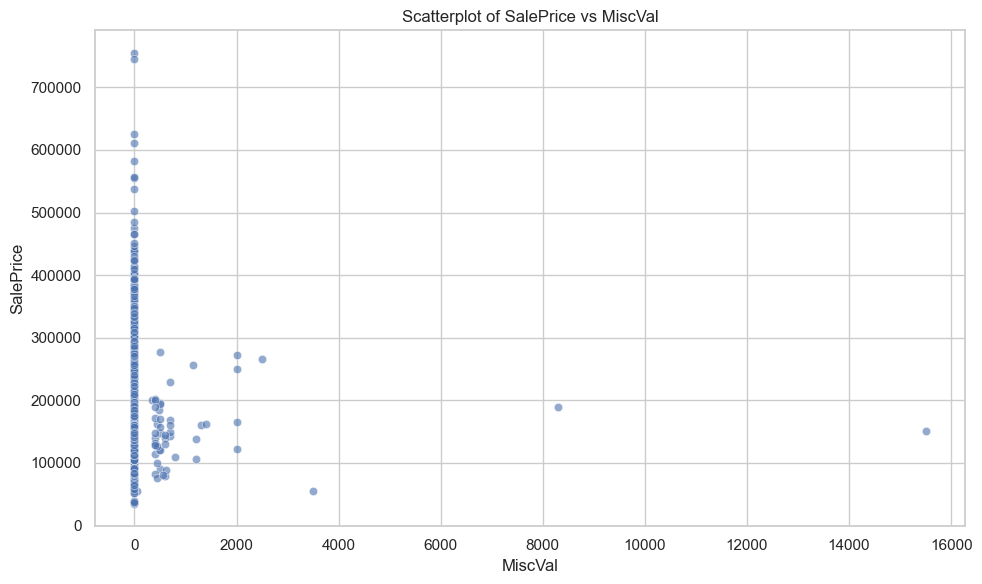

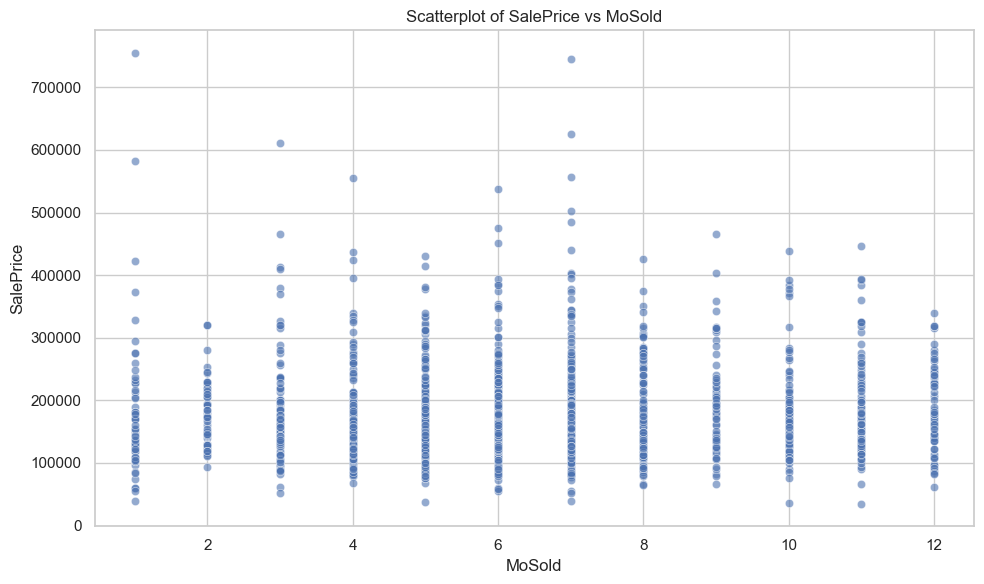

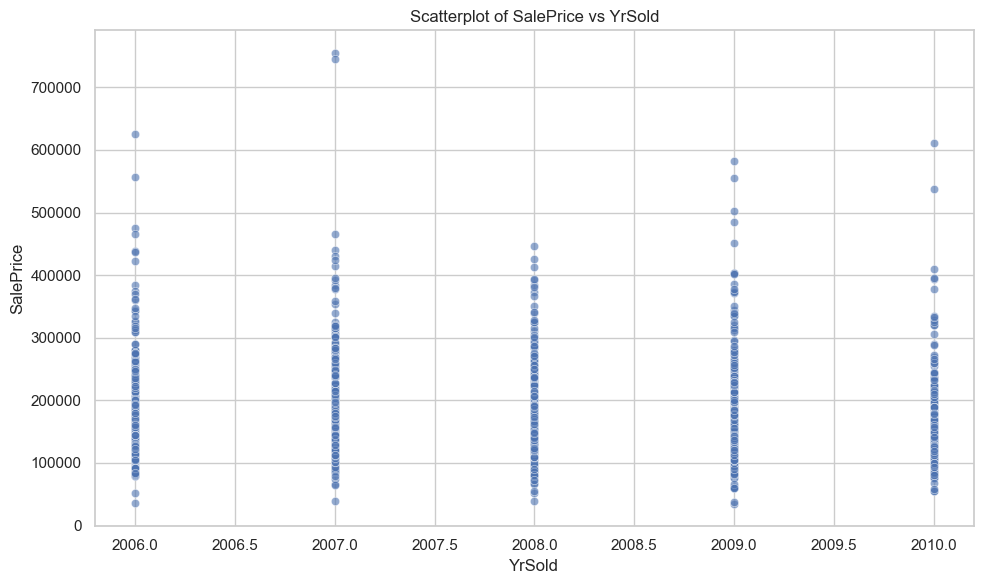

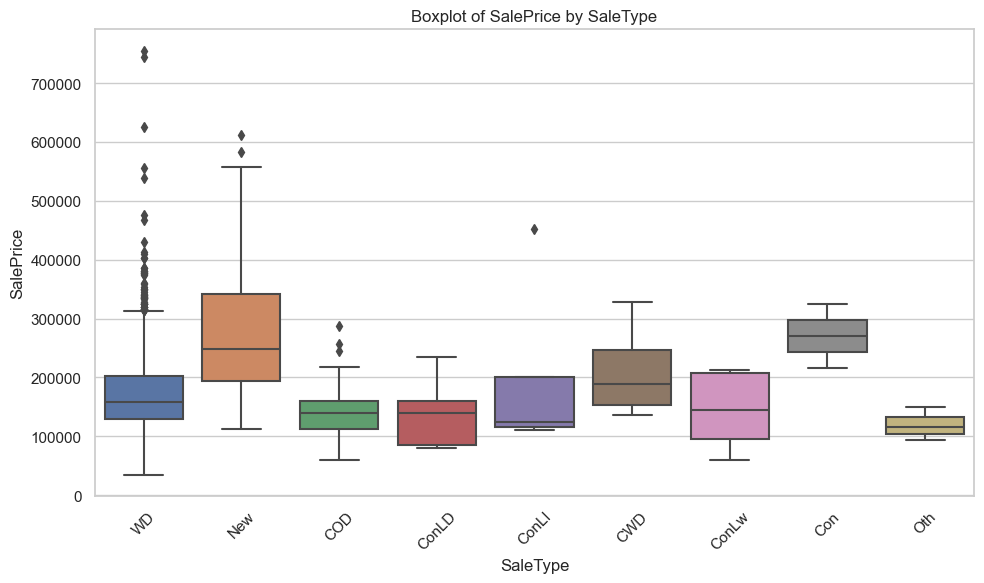

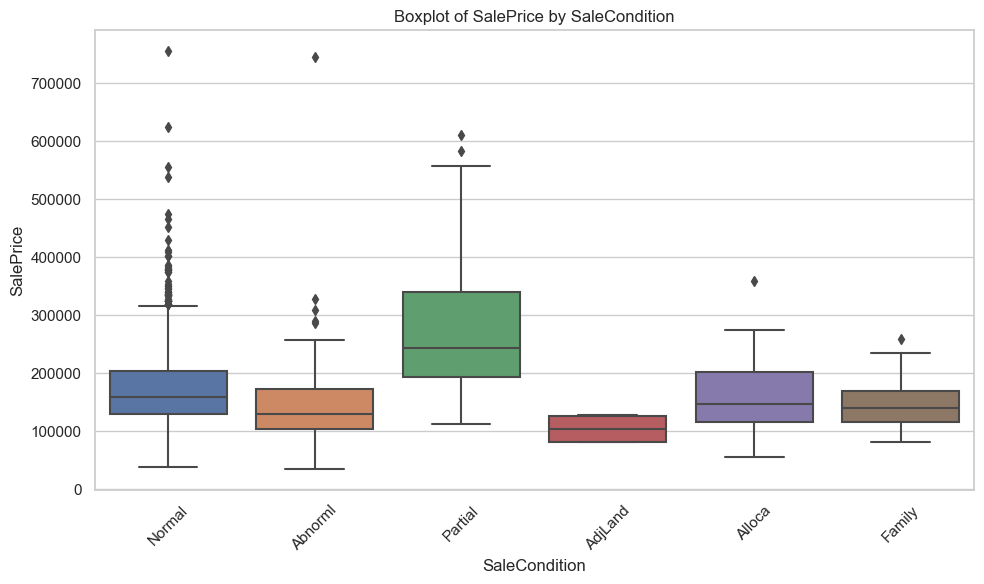

In [161]:
all_features = [col for col in train.columns if col not in ['Id', 'SalePrice']]

for feature in all_features:
    plt.figure(figsize=(10, 6))
    
    if train[feature].dtype == 'object':  # Categorical features
        sns.boxplot(data=train, x=feature, y='SalePrice')
        plt.title(f'Boxplot of SalePrice by {feature}')
        plt.xticks(rotation=45)
    else:  # Numerical features
        sns.scatterplot(data=train, x=feature, y='SalePrice', alpha=0.6)
        plt.title(f'Scatterplot of SalePrice vs {feature}')
    
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    
    save_path = os.path.join("..\\visualizations", f"{feature}_SalePrice_plot.png")
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    plt.close()


# Visualize Feature Correlation Heatmap

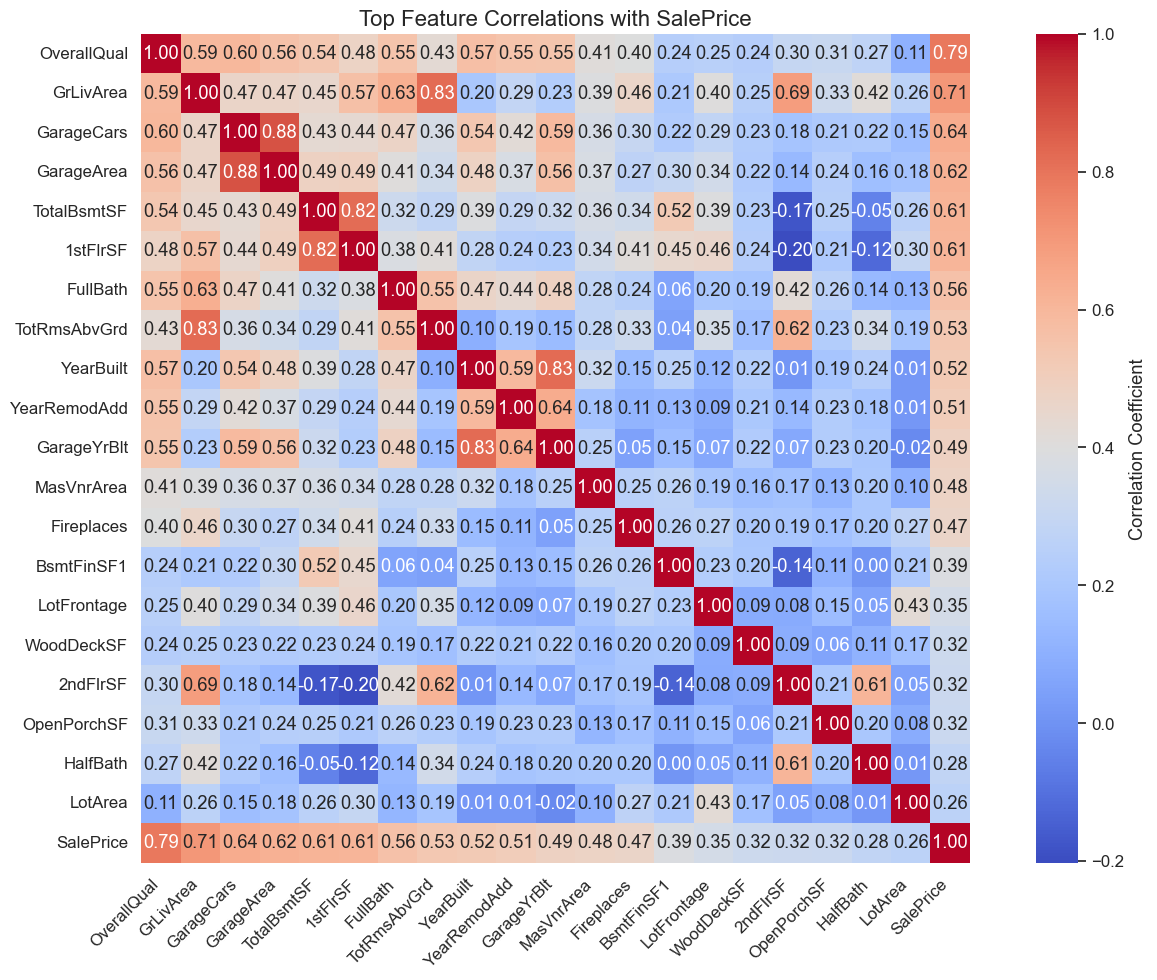

In [162]:
# Only numeric columns
numeric_df = train.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Sort features with highest absolute correlation to SalePrice
target_corr = corr_matrix['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False)

# Select top 20 most correlated features with SalePrice
top_features = target_corr.head(20).index.tolist() + ['SalePrice']

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.1)  # Slightly increase font size
sns.heatmap(train[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm",
            cbar_kws={"label": "Correlation Coefficient"}, square=True)

plt.title("Top Feature Correlations with SalePrice", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Cleaning

In [163]:
# PoolQC
train['PoolQC'].fillna('NoPool', inplace=True)
pool_map = {'NoPool': 0, 'Fa': 1, 'Gd': 2, 'Ex': 3}
train['PoolQC'] = train['PoolQC'].map(pool_map)

In [164]:
# MisFeature
train['MiscFeature'].fillna('None', inplace=True)
misc_map = {'None': 0, 'Shed': 1, 'Gar2': 2, 'Othr': 3, 'TenC': 4}
train['MiscFeature'] = train['MiscFeature'].map(misc_map)

In [165]:
# Alley
train['Alley'].fillna('NoAlley', inplace=True)
alley_map = {'NoAlley': 0, 'Grvl': 1, 'Pave': 2}
train['Alley'] = train['Alley'].map(alley_map)

In [166]:
# Fence
train['Fence'].fillna('NoFence', inplace=True)
fence_map = {'NoFence': 0, 'MnWw': 1, 'MnPrv': 2, 'GdWo': 3, 'GdPrv': 4}
train['Fence'] = train['Fence'].map(fence_map)

In [167]:
# FireplaceQu
train['FireplaceQu'].fillna('NoFireplace', inplace=True)
fireplace_map = {'NoFireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['FireplaceQu'] = train['FireplaceQu'].map(fireplace_map)

In [168]:
# LotFrontage
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [169]:
# GarageYrBlt GarageFinish, GarageQual, GarageCond
train['GarageYrBlt'].fillna(0, inplace=True)
garage_categorical_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_categorical_features:
    train[col].fillna('NoGarage', inplace=True)

garage_type_map = {'NoGarage': 0, 'Attchd': 1, 'Detchd': 2, 'BuiltIn': 3, 'Basment': 4, 'CarPort': 5, '2Types': 6}
train['GarageType'] = train['GarageType'].map(garage_type_map)

garage_finish_map = {'NoGarage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
train['GarageFinish'] = train['GarageFinish'].map(garage_finish_map)

garage_qual_cond_map = {'NoGarage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['GarageQual'] = train['GarageQual'].map(garage_qual_cond_map)
train['GarageCond'] = train['GarageCond'].map(garage_qual_cond_map)

In [170]:
# BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1
bsmt_categorical_features = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond']
for col in bsmt_categorical_features:
    train[col].fillna('NoBasement', inplace=True)

bsmt_numerical_features = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in bsmt_numerical_features:
    if col in train.columns:
        train[col].fillna(0, inplace=True)

bsmt_fin_type_map = {'NoBasement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
train['BsmtFinType1'] = train['BsmtFinType1'].map(bsmt_fin_type_map)
train['BsmtFinType2'] = train['BsmtFinType2'].map(bsmt_fin_type_map)

bsmt_exposure_map = {'NoBasement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
train['BsmtExposure'] = train['BsmtExposure'].map(bsmt_exposure_map)

bsmt_qual_cond_map = {'NoBasement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['BsmtQual'] = train['BsmtQual'].map(bsmt_qual_cond_map)
train['BsmtCond'] = train['BsmtCond'].map(bsmt_qual_cond_map)

In [171]:
# MasVnrType, MasVnrArea
train['MasVnrType'].fillna('None', inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)

masvnr_type_map = {'None': 0, 'BrkCmn': 1, 'BrkFace': 2, 'Stone': 3}
train['MasVnrType'] = train['MasVnrType'].map(masvnr_type_map)

In [172]:
# Electrical
train['Electrical'].fillna('SBrkr', inplace=True)
electrical_map = {'SBrkr': 0, 'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4}
train['Electrical'] = train['Electrical'].map(electrical_map)

In [173]:
missing_data = train.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [174]:
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
non_categorical_columns = train.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)


Categorical Columns:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Non-Categorical Columns:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'Op

In [175]:
ordinal_features = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
                    'HeatingQC', 'KitchenQual', 'Functional', 'PavedDrive', 'CentralAir']
ordinal_mappings = {
    'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},
    'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0},
    'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev': 0},
    'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Functional': {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
    'CentralAir': {'N': 0, 'Y': 1}
}


for feature, mapping in ordinal_mappings.items():
    train[feature] = train[feature].map(mapping)

one_hot_features = [col for col in categorical_columns if col not in ordinal_features]

train = pd.get_dummies(train, columns=one_hot_features, drop_first=True)

In [176]:
missing_data = train.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [177]:
print(train.info())
print(train.describe())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 190 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(61), uint8(126)
memory usage: 909.8 KB
None
                Id   MSSubClass  LotFrontage        LotArea        Alley  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.199658   10516.828082     0.090411   
std     421.610009    42.300571    22.431902    9981.264932     0.372151   
min       1.000000    20.000000    21.000000    1300.000000     0.000000   
25%     365.750000    20.000000    60.000000    7553.500000     0.000000   
50%     730.500000    50.000000    70.000000    9478.500000     0.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     0.000000   
max    1460.000000   190.000000   313.000000  215245.000000     2.000000   

          LotShape    Utilities    LandSlope  OverallQual  OverallCond  ...  \
count  1460.000000  1460.000000  1460.0000

# Save Clean Train Data

In [178]:
train.to_csv("../data/clean_train.csv", index=False)

print("Cleaned train dataset saved as clean_train.csv.")

Cleaned train dataset saved as clean_train.csv.


# Test Data Overview

In [179]:
print(test.info())
print(test.describe())
print(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [180]:
missing_data = test.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64


# Data Cleaning

In [181]:
# PoolQC
test['PoolQC'].fillna('NoPool', inplace=True)
pool_map = {'NoPool': 0, 'Fa': 1, 'Gd': 2, 'Ex': 3}
test['PoolQC'] = test['PoolQC'].map(pool_map)

In [182]:
# MisFeature
test['MiscFeature'].fillna('None', inplace=True)
misc_map = {'None': 0, 'Shed': 1, 'Gar2': 2, 'Othr': 3, 'TenC': 4}
test['MiscFeature'] = test['MiscFeature'].map(misc_map)

In [183]:
# Alley
test['Alley'].fillna('NoAlley', inplace=True)
alley_map = {'NoAlley': 0, 'Grvl': 1, 'Pave': 2}
test['Alley'] = test['Alley'].map(alley_map)

In [184]:
# Fence
test['Fence'].fillna('NoFence', inplace=True)
fence_map = {'NoFence': 0, 'MnWw': 1, 'MnPrv': 2, 'GdWo': 3, 'GdPrv': 4}
test['Fence'] = test['Fence'].map(fence_map)

In [185]:
# FireplaceQu
test['FireplaceQu'].fillna('NoFireplace', inplace=True)
fireplace_map = {'NoFireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
test['FireplaceQu'] = test['FireplaceQu'].map(fireplace_map)

In [186]:
# LotFrontage
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [187]:
# GarageYrBlt GarageFinish, GarageQual, GarageCond
test['GarageYrBlt'].fillna(0, inplace=True)
garage_categorical_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_categorical_features:
    test[col].fillna('NoGarage', inplace=True)

garage_type_map = {'NoGarage': 0, 'Attchd': 1, 'Detchd': 2, 'BuiltIn': 3, 'Basment': 4, 'CarPort': 5, '2Types': 6}
test['GarageType'] = test['GarageType'].map(garage_type_map)

garage_finish_map = {'NoGarage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
test['GarageFinish'] = test['GarageFinish'].map(garage_finish_map)

garage_qual_cond_map = {'NoGarage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
test['GarageQual'] = test['GarageQual'].map(garage_qual_cond_map)
test['GarageCond'] = test['GarageCond'].map(garage_qual_cond_map)

In [188]:
# BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1
bsmt_categorical_features = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond']
for col in bsmt_categorical_features:
    test[col].fillna('NoBasement', inplace=True)

bsmt_numerical_features = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in bsmt_numerical_features:
    if col in test.columns:
        test[col].fillna(0, inplace=True)

bsmt_fin_type_map = {'NoBasement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
test['BsmtFinType1'] = test['BsmtFinType1'].map(bsmt_fin_type_map)
test['BsmtFinType2'] = test['BsmtFinType2'].map(bsmt_fin_type_map)

bsmt_exposure_map = {'NoBasement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
test['BsmtExposure'] = test['BsmtExposure'].map(bsmt_exposure_map)

bsmt_qual_cond_map = {'NoBasement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
test['BsmtQual'] = test['BsmtQual'].map(bsmt_qual_cond_map)
test['BsmtCond'] = test['BsmtCond'].map(bsmt_qual_cond_map)

In [189]:
# MasVnrType, MasVnrArea
test['MasVnrType'].fillna('None', inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

masvnr_type_map = {'None': 0, 'BrkCmn': 1, 'BrkFace': 2, 'Stone': 3}
test['MasVnrType'] = test['MasVnrType'].map(masvnr_type_map)

In [190]:
# Electrical
test['Electrical'].fillna('SBrkr', inplace=True)
electrical_map = {'SBrkr': 0, 'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4}
test['Electrical'] = test['Electrical'].map(electrical_map)

In [191]:
missing_data = test.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

MSZoning       4
Utilities      2
Functional     2
GarageCars     1
GarageArea     1
KitchenQual    1
Exterior1st    1
Exterior2nd    1
SaleType       1
dtype: int64


In [192]:
train1 = pd.read_csv('../data/train.csv')
test['Utilities'].fillna(train1['Utilities'].mode()[0], inplace=True)
test['Functional'].fillna(train1['Functional'].mode()[0], inplace=True)
test['GarageCars'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)
test['KitchenQual'].fillna(train1['KitchenQual'].mode()[0], inplace=True)
test['MSZoning'].fillna(train1['MSZoning'].mode()[0], inplace=True)
test['Exterior1st'].fillna(train1['Exterior1st'].mode()[0], inplace=True)
test['Exterior2nd'].fillna(train1['Exterior2nd'].mode()[0], inplace=True)
test['SaleType'].fillna(train1['SaleType'].mode()[0], inplace=True)


In [193]:
missing_data = test.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])
print(test.info())

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-nul

In [194]:
categorical_columns = test.select_dtypes(include=['object']).columns.tolist()
non_categorical_columns = test.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Non-Categorical Columns:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'Op

In [195]:
missing_data = test.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])
print(test.info())
missing_cols = set(train.columns) - set(test.columns)
print(missing_cols)

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-nul

In [196]:
ordinal_mappings = {
    'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},
    'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0},
    'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev': 0},
    'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Functional': {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
    'CentralAir': {'N': 0, 'Y': 1}
}

ordinal_features = list(ordinal_mappings.keys())


for feature, mapping in ordinal_mappings.items():
    if feature in test.columns:
        test[feature] = test[feature].map(mapping)

In [197]:
missing_data = test.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])
print(test.info())
missing_cols = set(train.columns) - set(test.columns)
print(missing_cols)

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-nul

In [198]:

ohe_columns = [
    'MSZoning', 'Street', 'LandContour', 'LotConfig', 
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'Foundation', 'Heating', 'SaleType', 'SaleCondition'
]

test = pd.get_dummies(test, columns=ohe_columns, drop_first=True)

In [199]:
missing_data = test.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])
print(test.info())
missing_cols = set(train.columns) - set(test.columns)
print(missing_cols)

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 176 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(52), uint8(113)
memory usage: 879.2 KB
None
{'RoofMatl_Roll', 'RoofMatl_Membran', 'Condition2_RRAe', 'Condition2_RRAn', 'Heating_OthW', 'Exterior2nd_Other', 'SalePrice', 'HouseStyle_2.5Fin', 'Heating_GasA', 'RoofMatl_CompShg', 'Exterior1st_Stone', 'Condition2_RRNn', 'RoofMatl_Metal', 'Exterior1st_ImStucc'}


In [200]:
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0

test = test[train.columns]


In [201]:
if 'SalePrice' in test.columns:
    test = test.drop(columns=['SalePrice'])

In [202]:
missing_data = test.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [203]:
missing_cols = set(train.columns) - set(test.columns)
print(missing_cols)

{'SalePrice'}


In [204]:
print(test.info())
print(test.describe())
print(test.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 189 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(65), uint8(113)
memory usage: 1.0 MB
None
                Id   MSSubClass  LotFrontage       LotArea        Alley  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.955106   9819.161069     0.098698   
std     421.321334    42.746880    20.999091   4955.517327     0.373861   
min    1461.000000    20.000000    21.000000   1470.000000     0.000000   
25%    1825.500000    20.000000    60.000000   7391.000000     0.000000   
50%    2190.000000    50.000000    70.000000   9399.000000     0.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     0.000000   
max    2919.000000   190.000000   200.000000  56600.000000     2.000000   

          LotShape  Utilities    LandSlope  OverallQual  OverallCond  ...  \
count  1459.000000     1459.0  1459.000000  1459.00000

# Save Clean Test Data

In [205]:
test.to_csv('../data/clean_test.csv', index=False)
print("Cleaned test dataset saved as clean_test.csv.")

Cleaned test dataset saved as clean_test.csv.
